<a href="https://colab.research.google.com/github/Phubordin/portfolio-project/blob/main/portfolio-project/P03-Customer-Segmentation-and-RFM-Analysis-Using-Python-and-R-for-Strategic-Business-Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 คำแนะนำ :**

1. ถ้าเปิดดูจาก Google Colab ให้กด Table of Contents ที่แถบด้านซ้าย เพื่อไปยังหัวข้อที่สนใจ

2. ถ้าเปิดดูจาก Github ให้กด Ctrl+F เพื่อไปยังหัวข้อที่สนใจ (ที่บอกมาจาก  [My Portfolio Website](https://phubordin.github.io/My-Portfolio-Website/project_rfm_py_dsb10.html))

Note : เมื่อพึ่งเข้า Colab แนะนำให้ลองกด..

```
Runtime > Run all (รันทุกเซลล์)
```

เมื่อรู้สึกกว่า Colab ช้าให้กด

```
Runtime > Restart Session and Run all (ลบแคชและรันทุกเซลล์ใหม่)
```

# 🧭 Table of Contents

- **Import Library**

- **Create a Marker Result Function Using HTML**

- **Load Data**

- **Explore Data**
  - Explore Postal Code
  - Explore Date
  - Explore NaN
    - ALL Rows Specific NaN Columns
    - ALL Columns Specific NaN Rows
    - List of customers without a Postal Code
    - How are the transactions of these 5 customers?
    - Explore the Postal Code column for entries in the city of Burington
    - Explore other columns for entries in the city  of Burlington
    - Summarise the findings from the data exploration

- **Data Wrangling**

  - Prepare NaN
  - TRIM
  - Convert Date
  - Tidy Data
  - Export Tidy Data
  
- **RFM Analysis Using Python**

  - Create an RFM table to analyze customer purchasing behavior
  - Explore the distribution of the RFM dataset
  - Define evaluation criteria for identifying data distribution patterns
  - Generating RFM Scores for Customer Segmentation
  - Creating the Customer Segment Column Based on RFM Score (RFM Table Final)
  - Exporting Customer Segments (RFM) to CSV Format
  - Customer Count and Business Impact by Segment
  - Viz-The RFM Model Chart Pattern with the Highest Business Impact
  - Viz-The RFM Model Chart Pattern Based on Our Data
  - Summary RFM Python
  
- **Exploratory Sales & Customer Analysis (2017–2020)**

  - Export Customer Data in California (CSV Format)
  - Export Order Data (CSV): Customers in California and Texas, 2017
  - Sales Analysis 2017: Total, Average, and Standard Deviation by Month, Day, and Order
  - Highest Profit Segment in 2018
  - Top 5 States with the Lowest Total Sales (15 April – 31 December 2019)
  - Sales Proportion (%) in West and Central Regions, 2019
  - Top 10 Products by Order Volume vs. Total Sales (2019–2020)
  - Visual Insights: At Two Plots
  - Summary Exploratory Sales & Customer Analysis (2017-2020)
  
- **RFM Analysis Using R**

  - Set R
  - Import Library
  - Import Tidy Data
  - Create an RFM table to analyze customer purchasing behavior
  - Generating RFM Scores for Customer Segmentation
  - Creating the Customer Segment Column Based on RFM Score (RFM Table Final)
  - Customer Count and Business Impact by Segment
  - Viz-The RFM Model Chart Pattern Based on Our Data
  - Summary RFM R

- **Manage Variables**

  - Python Variables
  - R Variables


# **Import Library**

In [1]:
# ติดตั้ง gdown เพื่อ import gdown
!pip install -q gdown

import pandas as pd # ใช้จัดการข้อมูล DataFrame / ตารางข้อมูล | import, export ไฟล์ merge ตาราง
import numpy as np # พื้นฐานของการคำนวณเชิงตัวเลข ใช้จัดการ array, เวกเตอร์, เมทริกซ์ | ใช้คำนวณ percentile, np.where อื่นๆ
import matplotlib.pyplot as plt # เครื่องมือวาดกราฟระดับพื้นฐานและยืดหยุ่นสูง | ใช้ตอนแสดง กราฟต่างๆ
import matplotlib.patches as patches # ใช้สำหรับวาด วัตถุกราฟิกเช่น shape (สี่เหลี่ยม วงกลม ฯลฯ) บน plot | ใช้ตอน RFM Heap map
import seaborn as sns # เหมาะสำหรับสำรวจข้อมูลและวิเคราะห์ distribution | ใช้สร้าง Bloxplot
import scipy.stats as stats # ใช้สำหรับ วิเคราะห์ทางสถิติ แบบเจาะลึก | ใช้ตอนดูความเบ้ ความแหลมของของข้อมูล
import gdown # ดาวน์โหลดไฟล์จาก Google Drive ของผมที่ public ไว้
import os # เป็นโมดูล โหลด, บันทึก, จัดการไฟล์
import re # นำเข้าโมดูล Regular Expressions (RegEx) ของ Python
from matplotlib.colors import LinearSegmentedColormap # ใช้สร้าง gradient colormap แบบกำหนดเอง | ใช้ตอนไล่สเกลสี heat map
from IPython.display import display, HTML, Image # แสดงผล object (เช่น DataFrame, รูปภาพ, matplotlib figure ฯลฯ) แบบมีการจัดรูปสวยงาม


# **Create a Marker Result Function Using HTML**

In [2]:
# สร้างฟังก์ชันกำหนดสไตล์การเขียน Note ด้วย html ตัวอักษรสีดำ สีพื้นหลังสี powderblue ตำแหน่งตรงกลาง ขนาด 18px ทั้งหมดเป็นค่าเริ่มต้น
# (ต่อ) เราสามารถกำหนด format ได้ทั้งหมดตามที่กล่าวมา เช่น styled_note()
def styled_note(text, color="Black", background_color="powderblue", align="center", size="18px"):
    html = f"<div style='text-align:{align}; color:{color}; background-color:{background_color}; font-weight:bold; font-size:{size};'>{text}</div>"
    display(HTML(html))

# ทดสอบแบบกำหนดค่า
styled_note("Test_Specific", "Orange", "Gray", "Left", "22px")

# ทดสอบแบบค่าเริ่มต้น
styled_note("Test_Default")


# **Load Data**

In [3]:
file_path = "sample-store.csv"
file_id = "1-3p1eJCJZjYpfO4rfRh4aMehnUWS2LKY" # id ของไฟล์ที่เราจะใช้ในการวิเคราะห์ที่อยู่บน Google Drive ของผม

# ถ้าไม่มีไฟล์อยู่ใน local ให้ดาวน์โหลดจากลิงก์ และตั้งชื่อ sample-store.csv โดยแสดง progress ตอนโหลดด้วยว่าสำเร็จไหม
# ถ้ามีไฟล์อยู่ในแสดงข้อความ ✅ Already downloaded:
if not os.path.exists(file_path):
    gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)
else:
    print("✅ Already downloaded:", file_path)

df = pd.read_csv("sample-store.csv") # ไฟล์ที่ดาวน์โหลดมา Assign เข้าไปเป็นตัวแปร

styled_note("แสดงตารางที่ import เข้ามา : ⬇︎") # note
display(df.head()) # แสดงตาราง 5 iกline


Downloading...
From: https://drive.google.com/uc?id=1-3p1eJCJZjYpfO4rfRh4aMehnUWS2LKY
To: /content/sample-store.csv
100%|██████████| 2.29M/2.29M [00:00<00:00, 62.5MB/s]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Explore Data**

In [4]:
df.shape # (9994, 21 ex.header) ดูขนาด row * column ไม่รวมหัวตาราง

styled_note("หน้าแต่ละคอลัมน์เป็นยังไงในตาราง : ⬇︎")
display(df.info()) # เช็คว่าหน้าตาของ data มีคอลัมน์อะไรบ้าง ประเภทข้อมูลเป็นยังไง กี่แถว กี่คอลัมน์

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

None

## **Explore Postal Code**

In [5]:
# เห็นได้ว่า จำนวนแถวไม่ครบเพราะมี NaN

styled_note("สังเกตได้ว่า Postal Code เป็น float และมี NaN: ⬇︎")
df["Postal Code"].info() # ดูข้อมูลคอลัมน์ Postal Code เช่น มี Nan ไหม? ชนิดข้อมูลยังไง

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Postal Code
Non-Null Count  Dtype  
--------------  -----  
9983 non-null   float64
dtypes: float64(1)
memory usage: 78.2 KB


## **Explore Date**

In [6]:
# Order Date และ Ship Data เป็น object

styled_note("สังเกตได้ว่าวันที่เป็น object : ⬇︎")
df[["Order Date", "Ship Date"]] # ดูข้อมูลคอลัมน์ Postal Code เช่น มี Nan ไหม? ชนิดข้อมูลยังไง]].info()

,Order Date,Ship Date
0,11/8/2019,11/11/2019
1,11/8/2019,11/11/2019
2,6/12/2019,6/16/2019
3,10/11/2018,10/18/2018
4,10/11/2018,10/18/2018
...,...,...
9989,1/21/2017,1/23/2017
9990,2/26/2020,3/3/2020
9991,2/26/2020,3/3/2020
9992,2/26/2020,3/3/2020


## **Explore NaN**

2 Ways to Explore NaN Values

### ALL Rows Specific NaN Columns

In [7]:
df["Postal Code"] = df["Postal Code"].astype(str) # 📍 แปลงเป็น object เนื่องจากไม่มีเหตุผลในการตำนวณคอลัมน์นี้ และต้อง drop ตอลัมน์นี้
df["Postal Code"] = df["Postal Code"].astype(float) # แปลงเป็น float เหมือนเดิม เพื่อจะได้ explore ข้อมูลได้ง่ายๆ

styled_note("เลือกทุกแถวที่คอลัมน์นั้นมี NaN : ⬇︎")

 # ดึงทุกแถว เฉพาะคอลัมน์ที่มี NaN และลบ index ทิ้ง
display(df.loc[:, df.isna().any()
  ].sort_values("Postal Code").reset_index(drop = True))


,Postal Code
0,1040.0
1,1453.0
2,1453.0
3,1453.0
4,1453.0
...,...
9989,NaN
9990,NaN
9991,NaN
9992,NaN


### ALL Columns Specific NaN Rows


In [8]:
styled_note("เลือกทุกคอลัมน์ที่แถวมี NaN : ⬇︎")

# ดึงทุกคอลัมน์ เฉพาะแถวที่มี NaN และลบ index ทิ้ง
display(df[df.isna().any(axis=1)
          ].reset_index(drop = True))


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2235,CA-2020-104066,12/5/2020,12/10/2020,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
1,5275,CA-2018-162887,11/7/2018,11/9/2018,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
2,8799,US-2019-150140,4/6/2019,4/10/2019,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
3,9147,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
4,9148,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
5,9149,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
6,9387,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
7,9388,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
8,9389,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9,9390,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


### List of customers without a Postal Code

In [9]:
styled_note("รายชื่อลูกค้าที่ไม่มี Postal Code : ⬇︎")

# นำรายชื่อลูกค้าที่ไม่มี Postal Code
df[df.isna().any(axis=1)
  ][["Customer Name", "Postal Code"]
    ]["Customer Name"
     ].unique(
     ).reshape(-1, 1)


array([['Quincy Jones'],
       ['Stewart Visinsky'],
       ['Valerie Mitchum'],
       ['Claudia Bergmann'],
       ['Raymond Messe']], dtype=object)

### How are the transactions of these 5 customers?

In [10]:
styled_note("สำรวจ Transaction ลูกค้า 5 คนว่าไปส่งของที่ไหน : ⬇︎")

# สำรวจลูกค้า 5 คนที่ไม่มี Postal Code เค้าเค้าสั่งซื้อสินค้า บิลไหน และส่งไปที่ไหนบ้าง เพื่อที่จะดูว่าเค้าสั่งไปส่งที่ไหน เพื่อเพิ่มโอกาสที่ Exploration Postal Code ที่หายไป
df[df["Customer Name"]
   .isin(['Quincy Jones', 'Stewart Visinsky', 'Valerie Mitchum', 'Claudia Bergmann', 'Raymond Messe'])
   ][
       ["Customer Name", "Order ID", "State", "City", "Postal Code", "Product Name"]
       ].sort_values(["Postal Code", "Customer Name"]
                     ).reset_index(drop=True)


,Customer Name,Order ID,State,City,Postal Code,Product Name
0,Claudia Bergmann,CA-2018-111094,Massachusetts,Franklin,2038.0,Tops Wirebound Message Log Books
1,Claudia Bergmann,CA-2018-111094,Massachusetts,Franklin,2038.0,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ..."
2,Raymond Messe,CA-2017-141278,Connecticut,Meriden,6450.0,Newell 341
3,Valerie Mitchum,CA-2020-107720,New Jersey,Westfield,7090.0,Decoflex Hanging Personal Folder File
4,Quincy Jones,CA-2018-130995,New York,New York City,10009.0,Cush Cases Heavy Duty Rugged Cover Case for Sa...
...,...,...,...,...,...,...
73,Raymond Messe,US-2020-127292,Vermont,Burlington,NaN,Xerox 1881
74,Raymond Messe,US-2020-127292,Vermont,Burlington,NaN,Avanti 4.4 Cu. Ft. Refrigerator
75,Raymond Messe,US-2020-127292,Vermont,Burlington,NaN,Poly String Tie Envelopes
76,Stewart Visinsky,CA-2018-162887,Vermont,Burlington,NaN,Safco Contoured Stacking Chairs


### Explore the Postal Code column for entries in the city of Burlington

In [11]:
styled_note("สำรวจที่อยู่ Burlington มีบางที่มีเลข Postal Code: ⬇︎")

# สังเกตว่าลูกค้า 5 คน อยู่ที่ Burlington ดังนั้นเราจะลองดึงเมือง Burlington และคอลัมน์ Postal มาดู
df[df["City"] == "Burlington"][["City", "Postal Code"]].sort_values("Postal Code")


,City,Postal Code
683,Burlington,27217.0
684,Burlington,27217.0
1038,Burlington,27217.0
1039,Burlington,27217.0
2928,Burlington,27217.0
1393,Burlington,27217.0
5065,Burlington,27217.0
5066,Burlington,27217.0
8318,Burlington,27217.0
8317,Burlington,27217.0


### Explore other columns for entries in the city of Burlington

เราควรที่จะใช้ค่า Mode, Mean, Median แทนค่า NaN ดีไหม?
- คำตอบ: ❌ ไม่ได้ เพราะ..

1. Mean, Median
  - เป็นการวิเคราะห์เชิงปริมาณ ซึ่งคอลัมน์ Postal Code เป็น object ตามที่บอกไปแล้วก่อนหน้า
2. Mode
  - เราต้องสำรวจข้อมูลให้ครบก่อนว่าทำไมถึงมี เมือง Burlington ที่มี Postal ล่ะ? ลูกค้าเป็นใคร transaction เป็นแบบไหน?
  - output ที่อยู่ด้านล่าง ⬇︎

In [12]:
styled_note("สำรวจคอลัมน์อื่นๆที่ลูกค้าสั่งของไปเมือง Burlington")

# กรอง Burlington เพื่อดูรายละเอียดชส่วนอื่นๆของข้อมูล
df[df["City"] == "Burlington"][
    ["Customer Name", "Order ID", "State", "City", "Postal Code", "Product Name"]
    ].sort_values("Postal Code").reset_index(drop=True)


,Customer Name,Order ID,State,City,Postal Code,Product Name
0,Grant Thornton,US-2020-168116,North Carolina,Burlington,27217.0,Cubify CubeX 3D Printer Triple Head Print
1,Grant Thornton,US-2020-168116,North Carolina,Burlington,27217.0,Eureka The Boss Plus 12-Amp Hard Box Upright V...
2,Jennifer Halladay,CA-2020-121818,North Carolina,Burlington,27217.0,Newell 336
3,Jennifer Halladay,CA-2020-121818,North Carolina,Burlington,27217.0,Staples in misc. colors
4,Tracy Hopkins,US-2020-120390,North Carolina,Burlington,27217.0,GBC DocuBind P400 Electric Binding System
5,Yana Sorensen,CA-2020-124828,North Carolina,Burlington,27217.0,4009 Highlighters by Sanford
6,Shahid Collister,CA-2020-142090,North Carolina,Burlington,27217.0,Logitech Wireless Gaming Headset G930
7,Shahid Collister,CA-2020-142090,North Carolina,Burlington,27217.0,Bush Advantage Collection Racetrack Conference...
8,Henry MacAllister,CA-2020-130904,North Carolina,Burlington,27217.0,Newell 321
9,Henry MacAllister,CA-2020-130904,North Carolina,Burlington,27217.0,Pencil and Crayon Sharpener


```
เอ้ะ ! มันมีเมืองเดียวกัน แต่ตั้งอยู่คนละรัฐได้ด้วยหรอ?
ผลปรากฎว่า..

- ใช่ครับ เป็นเรื่องปกติของอเมริกาที่มีตัวอักษรชื่อเมืองเหมือนกัน
แต่อยู่รัฐที่แตกต่างกัน

```

รัฐที่มีเมือง Burlington อยู่มีรัฐต่อไปนี้

- Burlington, North Carolina อยู่ในแถบภาคใต้ ใกล้ Greensboro
- Iowa เป็นเมืองริมแม่น้ำ Mississippi
- Burlington, Vermont เป็นเมืองใหญ่ที่สุดในรัฐ Vermont    
  (มีค่า Postal Code ว่างในรัฐนี้)
- New Jersey



```
เหมือนอำเภอพิเศษบ้านเราคือ อำเภอเฉลิมพระเกียรติ

ตั้งอยู่ในจังหวัดต่อไปนี้
- นครราชสีมา
- นครศรีธรรมราช
- น่าน
- บุรีรัมย์
- สระบุรี

```



อ้างอิงจาก [ห้าอำเภอในประเทศไทยที่มีชื่ออำเภอเหมือนกันทุกตัวอักษร](https://board.postjung.com/1460246)

## Summarize the findings from the data exploration

1. ต้องเปลี่ยน Date format เป็นวันที่มาตรฐานเป็น ISO
2. จัดการ NaN ด้วยการลบคอลัมน์ Postal Code ทิ้ง
3. เพิ่มเติม ใช้ Trim เพื่อตัด white space ที่เกินความจำเป็น

การลบ NaN ทิ้งไม่ใช่ทางออกที่ดีที่สุด


```
> 📍 ทางออกที่ดีที่สุดในการจัดการ NaN
คือแก้ไขที่ข้อมูลต้นทางว่าเก็บ Data เหล่านี้มาได้ยังไง

```

# **Data Wrangling**

3 ข้อที่ต้องจัดการกับข้อมูลชุดนี้

1. Prepare NaN
2. Trim
3. Convert Date




## **Prepare NaN**

In [13]:
# Drop NaN Column เพราะไม่ได้ใช้ เราจะต้องไม่มี NaN ในการวิเคราะห์ Data
# ควรแก้ต้นทางหาก NaN

df = df.drop("Postal Code", axis = 1)
styled_note("Table ที่ไม่มี NaN : ⬇︎")
display(df)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,1/21/2017,1/23/2017,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## **TRIM**

In [14]:
# Trim ลบช่องว่างไม่จำเป็นออกไปกับ string

# 1. ปรับช่องว่าง ค่าในตาราง
# \s+ = ตรงกับ whitespace ทุกชนิด (space, tab, newline ฯลฯ) ที่ติดกันตั้งแต่ 1 ตัวขึ้นไป
# " " = แทนด้วยช่องว่างแค่ 1 ตัว
# .strip() = ลบ space ที่หัวท้ายอีกที (กันเหนียว)
# ปรับใช้ฟังก์ชันค่าแต่ละค่าภายในตาราง df(ไม่รวมหัวตาราง) โดยแทนที่ space, tab, newline ฯลฯ ที่อยู่ระหว่างข้อความแทนด้วย 1 white space เท่านั้น
# (ต่อ) และลบ white space ที่อยู่ส่วนหัว ส่วนท้าย ของข้อความนั้นออกไป โดยเข้าไปหาดูว่าค่าแต่ละค่าภายในตาราง df นั้นเป็น string ไหม
# (ต่อ) ถ้าเป็น string ก็ปรับใช้ฟังก์ชันนี้ได้เลย แต่ถ้าไม่ก็ให้คงไว้ของค่านั้นไม่เดิมไม่ต้องเปลี่ยนแปลงอะไร
df = df.applymap(lambda x: re.sub(r"\s+", " ", x).strip() if isinstance(x, str) else x)

# 2. ปรับช่องว่าง ล้างชื่อคอลัมน์
# เหมือนข้อ 1 แต่เป็นหัว โดยใช้ for loop ในการแสดงชื่อคอลัมน์ทั้งหมดที่ถูกแก้ไขให้เหมาะสมแล้วทีละตัว
df.columns = [re.sub(r"\s+", " ", col).strip() for col in df.columns]

styled_note("Table ที่ไม่มี NaN, ช่องว่างเท่ากันๆ : ⬇︎")
display(df)



<ipython-input-14-3d7f5ed1275e>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: re.sub(r"\s+", " ", x).strip() if isinstance(x, str) else x)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,1/21/2017,1/23/2017,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## **Convert Date**

In [15]:
# จากก่อนหน้าทำไมต้อง convert date
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format = "%m/%d/%Y") # format convert to be ISO Time
df["Order Date"] = pd.to_datetime(df["Order Date"], format = "%m/%d/%Y") # format convert to be ISO Time

styled_note("Table ที่ไม่มี NaN, ช่องว่างเท่ากันๆ และวันที่เป็นมาตรฐาน ISO : ⬇︎")
display(df)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## **Tidy Data**

In [16]:
styled_note("ข้อมูลที่พร้อมนำไปวิเคราะห์ต่อ Tidy Data : ⬇︎")
display(df.head()) # ข้อมูลที่สะอาด (แสดงผลเป็นตาราง ใช้เหมือน print แค่ถ้าอยากโชว์เป็น Dataframe ให้ใช้ display)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Export Tidy Data

In [17]:
# ส่งออกข้อมูลที่ clean แล้วโดยลบ เลข index หรือเลขแถวออก
df.to_csv("tidy-data.csv", index = False)

# RFM Analysis Using Python


## **Create an RFM table to analyze customer purchasing behavior**

In [18]:
m1 = df.groupby("Customer Name")["Sales"].sum().reset_index() # สร้างตาราง m1 เก็บยอดขายรวมจัดกลุ่มตาม Customer Name จัดเรียงลำดับใหม่

# สร้างตาราง m2 เก็บจำนวนเดือนครั้งที่ Customer Active จัดเรียงลำดับใหม่
m2 = df.groupby("Customer Name")["Order Date"
      ].apply(lambda x: x.dt.to_period("M")
      .nunique()
      ).reset_index()

behavior_customers = pd.merge(m1, m2, on = "Customer Name") # นำตาราง m1 กับ m2 มา Join กันด้วย Customer Name ตั้งชื่อตารางใหม่ behavior_customers
behavior_customers["Monetary"] = behavior_customers["Sales"] / behavior_customers["Order Date"] # สร้างคอลลัมน์ใหม่ ยอดขายเฉลี่ยต่อเดือน โดยคำนวณจาก 2 คอลัมน์แรกตั้งชื่อใหม่คือ Monetary
behavior_customers = behavior_customers[["Customer Name", "Monetary"]] # update ตาราง behavior_customers ใหม่โดยเอามาแค่ Customer Name และ Monetary

f1 = df.groupby("Customer Name")["Order ID"].nunique().reset_index() # สร้างตาราง f1 เก็บจำนวนครั้งที่ลูกค้าซื้อ โดยนับ Order ID ที่ไม่ซ้ำจัดกลุ่มตาม Customer Name จัดเรียงลำดับใหม่
behavior_customers = pd.merge(behavior_customers, f1, on = "Customer Name") # นำตาราง f1 ไปต่อเป็นคอลัมน์ที่ 3 ของตาราง behavior_customers

r1 = df.groupby("Customer Name")["Order Date"].max().reset_index() # สร้างตารางใหม่ชื่อ r1 เก็บเป็นตารางวันที่ลูกค้าเข้ามาซื้อล่าสุด จัดกลุ่มตาม Customer Name จัดเรียงลำดับใหม่
r1["lastest_date"] = df["Order Date"].max() # สร้างคอลัมน์ใหม่จากตาราง r1 ชื่อ lastest_date เก็บค่าวันที่ล่าสุดที่มีการเปิดบิลทั้งหมดของ Transaction
r1["no. date"] = r1["lastest_date"] - r1['Order Date'] # สร้างคอลัมน์ใหม่ชื่อ no. date เก็บค่าระยะห่างระหว่างวันที่ลูกค้าซื้อล่าสุดกับวันที่มีการเปิดบิลล่าสุดใน Transaction (datetime type)
r1["no. date"] = r1["no. date"].dt.days # แปลงคอลัมน์ no. date เป็นจำนวนเต็ม int
r1 = r1[["Customer Name", "no. date"]] # update ตาราง r1 ให้มีแค่ 2 คอลัมน์ Customer Name กับ no. date

df_rfm1 = pd.merge(behavior_customers, r1, on = "Customer Name") # นำตาราง r1 กับ behavior_customers มา Join กันด้วย Customer Name ตั้งชื่อตารางใหม่ df_rfm1
df_rfm1.columns = ['Customer Name', 'Monetary', 'Frequency', 'Recently (Days)'] # ตั้งชื่อคอลัมน์ใหม่ ภายในตาราง df_rfm1
df_rfm1 = df_rfm1[["Customer Name", "Recently (Days)", "Frequency", "Monetary"]] # สลับตำแหน่งคอลัมน์ให้เรียงตัวกันเป็น Customer Name | R | F | M

styled_note("ตารางดูพฤติกรรมลูกค้า : ⬇︎")
display(df_rfm1) # แสดงผลเป็นตาราง ใช้เหมือน print แค่ถ้าอยากโชว์เป็น Dataframe ให้ใช้ display


,Customer Name,Recently (Days),Frequency,Monetary
0,Aaron Bergman,416,3,295.385333
1,Aaron Hawkins,12,7,249.242857
2,Aaron Smayling,88,7,435.813143
3,Adam Bellavance,54,8,1107.945714
4,Adam Hart,34,10,325.033700
...,...,...,...,...
788,Xylona Preis,43,11,296.832250
789,Yana Sorensen,9,8,840.055500
790,Yoseph Carroll,4,5,1090.870000
791,Zuschuss Carroll,54,13,891.745222


## **Explore the distribution of the RFM dataset**

,Recently (Days),Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,146.916772,6.316520,497.350529
std,186.393206,2.550885,456.307968
min,0.000000,1.000000,2.416500
25%,30.000000,5.000000,234.079143
50%,75.000000,6.000000,387.090286
75%,183.000000,8.000000,620.122400
max,1165.000000,17.000000,5008.610000
skew,2.272914,0.362409,3.670047
kurtosis,5.795721,-0.025969,22.645064


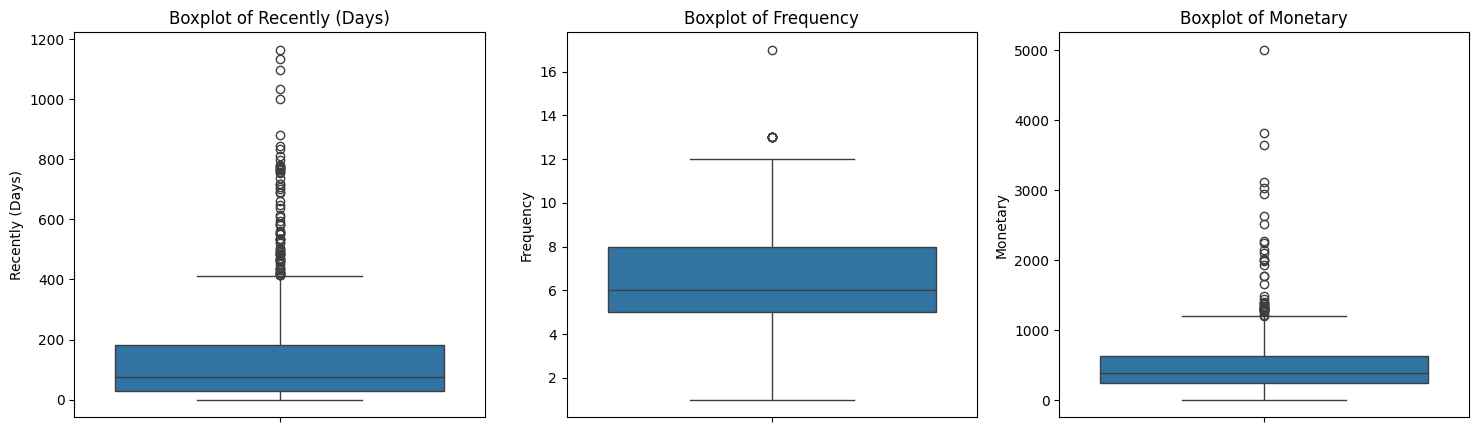

In [19]:
# คำนวณสถิติเบื้องต้น (mean, median, std)
rfm_stats = df_rfm1.describe()

# คำนวณ skewness และ kurtosis เพิ่ม 2 แถว skew, kurtosis เข้าไปในตาราง
rfm_stats.loc["skew"] = df_rfm1[["Recently (Days)", "Frequency", "Monetary"]].skew() # วัดความเบ้ของข้อมูล (บวก เบ้ขวากว่าปกติ, ลบเบ้ซ้ายกว่าปกติ, ใกล้หรือเท่ากับศูนย์กระจายตัวแทบจะปกติ)
rfm_stats.loc["kurtosis"] = df_rfm1[["Recently (Days)", "Frequency", "Monetary"]].kurtosis() # วัดความแหลมของข้อมูล (บวก แหลมกว่าปกติ, ลบ แบนกว่าปกติ, ใกล้หรือเท่ากับศูนย์กระจายตัวแทบจะปกติ)

styled_note("สรุปค่าสถิติ RFM : ⬇︎")
display(rfm_stats) # แสดงผลเป็นตาราง ใช้เหมือน print แค่ถ้าอยากโชว์เป็น Dataframe ให้ใช้ display

fig1, axes = plt.subplots(1, 3, figsize=(18, 5)) # กำหนดขนาด canvas : width*height = 18*5 | ภายใน canvas มีตำแหน่ง Chart 3 ตำแหน่ง คือ ตำแหน่งที่ 1*1(0), 1*2(1), 1*3(2) เรียงตัวกันเป็นแนวนอน

sns.boxplot(y = df_rfm1["Recently (Days)"], ax=axes[0]) # สร้าง boxplot chart โดยใช้ข้อมูลคอลัมน์ Recently (Days) จากตาราง df_rfm1 ที่ตำแหน่ง canvas ชื่อ axes ตำแหน่งที่ 1*1(0)
axes[0].set_title("Boxplot of Recently (Days)") # กำหนดชื่อ title chart ว่า Boxplot of Recently (Days)

sns.boxplot(y=df_rfm1["Frequency"], ax=axes[1])  # สร้าง boxplot chart โดยใช้ข้อมูลคอลัมน์ Frequency จากตาราง df_rfm1 ที่ตำแหน่ง canvas ชื่อ axes ตำแหน่งที่ 1*2(1)
axes[1].set_title("Boxplot of Frequency")       # กำหนดชื่อ title chart ว่า Boxplot of Frequency

sns.boxplot(y=df_rfm1["Monetary"], ax=axes[2])   # สร้าง boxplot chart โดยใช้ข้อมูลคอลัมน์ Monetary จากตาราง df_rfm1 ที่ตำแหน่ง canvas ชื่อ axes ตำแหน่งที่ 1*3(2)
axes[2].set_title("Boxplot of Monetary")        # กำหนดชื่อ title chart ว่า Boxplot of Monetary

styled_note("แสดงกราฟ Boxplot ทั้ง 3 แท่ง : ⬇︎")
display(fig1)   # แสดงกราฟ
plt.close(fig1) # ป้องกันการแสดงกราฟซ้อนกันกัน


## **Define evaluation criteria for identifying data distribution patterns**

In [20]:
# สร้างเกณฑ์ การตัดสินใจว่าควรใช้ quartile หรือ percentile กับชุดข้อมูล 3 ชุดที่ว่า คือ Recently (Days), Frequency,	Monetary

decisions = {} # สร้าง empty dictionary รอการ assign ค่าเพื่อตัดสินว่าควรใช้ quartile หรือ percentile

for col in ["Recently (Days)", "Frequency", "Monetary"]: # สร้าง for loop สำหรับทุกๆ argument ที่อยู่ในลิสต์
    skewness = df_rfm1[col].skew() # เลือกคอลัมน์ในตาราง df_rfm1 ไปคำนวณหาวามเบ้
    if abs(skewness) <= 0.5: # ทดสอบความเบ้ ถ้าความเบ้อยู่ในช่วงตั้งแต่ -0.5 ไม่เกิน 0.5
        decision = "Normal distribution (Quartile is fine)" # แสดงข้อความว่า การจายตัวค่อนข้างปกติ แบ่งโดยช่วงข้อมูลเท่ากันๆตามส่วนที่กำหนด
    elif skewness > 0.5: # ทดสอบความเบ้ ถ้ามากกว่า 0.5
        decision = "Right-skewed (Percentile is better)" # แสดงข้อความว่า กระจายเบ้ขวาแน่นอนให้ใช้การแบ่งข้อมูล ตามการบอกตำแหน่งแบบ percentile
    else:           # ทดสอบความเบ้ ถ้าน้อยกว่า -0.5
        decision = "Left-skewed (Percentile is better)" # แสดงข้อความว่า กระจายเบ้ซ้ายแน่นอนให้ใช้การแบ่งข้อมูล ตามการบอกตำแหน่งแบบ percentile
    decisions[col] = decision # นำข้อความที่ได้ไปใส่ใน value โดย Key เหล่านี้ Recently (Days), Frequency, Monetary

styled_note("ข้อมูลตัดสินใจการแบ่งกลุ่มลูกค้า : ⬇︎")
display(decisions) # แสดงเป็น dictionary ว่าควรใช้เกณฑ์อันนั้นเป็นการแบ่ง


{'Recently (Days)': 'Right-skewed (Percentile is better)',
 'Frequency': 'Normal distribution (Quartile is fine)',
 'Monetary': 'Right-skewed (Percentile is better)'}

## **Generating RFM Scores for Customer Segmentation**


In [21]:
df_rfm2 = df_rfm1.copy() # copy table

def assign_rfm_score(value, percentiles, labels): # สร้างฟังก์ชัน assign_rfm_score รับค่า parameter 3 ค่า สำหรับให้คะแนนตาม percentile
    return labels[np.searchsorted(percentiles, value)] # คืนค่าที่ ค้นหาค่าที่กำหนด ไปเปรียบเทียบกับค่าเรียงลำดับจากน้อยน้อยไปมาก ตามตำแหน่ง percentiles หลังจากนั้นอยู่ที่ percentiles ที่เท่าไรก็คืนตาม labels ที่กำหนดกลับมา

# คำนวณ percentile สำหรับแต่ละตัวแปร
recently_percentiles = np.percentile(df_rfm2["Recently (Days)"], [20, 40, 60, 80]) # คำนวณหา percentile ที่ 20, 40, 60, 80 ตามลำดับในคอลัมน์ Recently (Days) และเก็บค่าไว้ในตัวแปร recently_percentiles
monetary_percentiles = np.percentile(df_rfm2["Monetary"], [20, 40, 60, 80]) # คำนวณหา percentile ที่ 20, 40, 60, 80 ตามลำดับในคอลัมน์ Monetary และเก็บค่าไว้ในตัวแปร monetary_percentiles

# ให้คะแนน RFM ตาม percentile สำหรับ RM เเต่ F จะใช้การแบ่งส่วนเท่าๆกัน
df_rfm2["R_Score"] = df_rfm2["Recently (Days)" # สร้างคอลัมน์ R_Score เก็บค่า Score จากคอลัมน์ Recently (Days)
                            ].apply(lambda x: assign_rfm_score(x, recently_percentiles, [5, 4, 3, 2, 1])) # โดยที่เรียกใช้ค่าแต่ละเเถวใน Recently (Days) โดยค่าแต่ละค่านำไป ค้นหาเปรียบเทียบกับค่าใน recently_percentiles ที่สร้างก่อนหน้าแล้วให้ 5 เมื่อพึ่งเปิดบิล และ 1 เมื่อไม่ได้เปิดบิลนานแล้ว

df_rfm2["F_Score"] = pd.qcut(df_rfm2["Frequency"], q=5, labels=[1, 2, 3, 4, 5]) # สร้างคอลัมน์ F_Score แบ่งข้อมูลเป็น 5 แต่ละส่วนมีจำนวนข้อมูลเท่าๆกัน โดยที่ซื้อบ่อยมากให้ 5 ซื้อไม่บ่อยให้ 1

df_rfm2["M_Score"] = df_rfm2["Monetary" # สร้างคอลัมน์ M_Score เก็บค่า Score จากคอลัมน์ Monetary
                            ].apply(lambda x: assign_rfm_score(x, monetary_percentiles, [1, 2, 3, 4, 5])) # โดยที่เรียกใช้ค่าแต่ละเเถวใน Monetary โดยค่าแต่ละค่านำไป ค้นหาเปรียบเทียบกับค่าใน recently_percentiles ที่สร้างก่อนหน้าแล้วให้ 5 เมื่อยอดซื้อต่อเดือนสูง และ 1 เมื่อยอดซื้อต่อเดือนต่ำ

df_rfm2["F_Score"] = df_rfm2["F_Score"].astype(int) # แปลง F_Score จาก category เป็น int

df_rfm2["Y_(F+M)/2"] = (df_rfm2["F_Score"] + df_rfm2["M_Score"]) / 2 # สร้างคอลัมน์ใหม่โดยการเอาคอลัมน์ F_Score กับ M_Score มาหารสองเพื่อแตรียมกำหนดเป็นแกนตั้ง

styled_note("เพิ่ม RFM-Score Columns : ⬇︎")
display(df_rfm2) # แสดงผล


,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5
4,Adam Hart,34,10,325.033700,4,5,3,4.0
...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0


## **Creating the Customer Segment Column Based on RFM Score (RFM Final)**

In [22]:
df_rfm3 = df_rfm2.copy() # reuse Table

def classify_rfm(row): # สร้างฟังก์ชันเพื่อจำแนกดูว่า 2 ต้องมี range ที่เท่าไรถึงจะได้อยู่ใน กลุ่มลูกค้าที่เหมาะสม
    r, y = row["R_Score"], row["Y_(F+M)/2"] # กำหนดค่าในคอลัมน์ R_Score และ Y_(F+M)/2 ในตัวแปร r และ y เป็นหลัก

    if r >= 5 and y >= 4:  # ถ้า R_Score มีค่าตั้งแต่ 5 ขึ้นไป และ y มีค่าตั้งแต่ 4 ขึ้นไป
        return "Champions"  # ให้คืนค่า Champions
    elif r >= 3 and y >= 4:  # ถ้า R_Score มีค่าตั้งแต่ 3 ขึ้นไป และ y มีค่าตั้งแต่ 4 ขึ้นไป
        return "Loyal Customers"  # ให้คืนค่า Loyal Customers
    elif r >= 4 and 2 <= y < 4:  # ถ้า R_Score มีค่าตั้งแต่ 4 ขึ้นไป และ y มีค่าตั้งแต่ 2 ไม่ถึง 4
        return "Potential Loyalists"  # ให้คืนค่า Potential Loyalists
    elif r >= 5 and 1 <= y < 2:  # ถ้า R_Score มีค่าตั้งแต่ 5 ขึ้นไป และ y มีค่าตั้งแต่ 1 ไม่ถึง 2
        return "New Customers"  # ให้คืนค่า New Customers
    elif 4 <= r < 5 and y < 2:  # ถ้า R_Score มีค่าตั้งแต่ 4 ไม่ถึง 5 และ y น้อยกว่า 2
        return "Promising"  # ให้คืนค่า Promising
    elif 3 <= r < 4 and 1 <= y < 3:  # ถ้า R_Score มีค่าตั้งแต่ 3 ไม่ถึง 4 และ y มีค่าตั้งแต่ 1 ไม่ถึง 3
        return "About to Sleep"  # ให้คืนค่า About to Sleep
    elif 3 <= r < 4 and 3 <= y < 4:  # ถ้า R_Score มีค่าตั้งแต่ 3 ไม่ถึง 4 และ y มีค่าตั้งแต่ 3 ไม่ถึง 4
        return "Need Attention"  # ให้คืนค่า Need Attention
    elif 1 <= r < 3 and y >= 5:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้งแต่ 5 ขึ้นไป
        return "Can't Lose Them"  # ให้คืนค่า Can't Lose Them
    elif 1 <= r < 3 and 3 <= y < 5:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้ง 3 ไม่ถึง 5
        return "At Risk"  # ให้คืนค่า At Risk
    elif 1 <= r < 3 and 2 <= y < 3:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้งแต่ 2 ไม่ถึง 3
        return "Hibernating"  # ให้คืนค่า Hibernating
    elif 1 <= r < 3 and 1 <= y < 2:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้งแต่ 1 ไม่ถึง 2
        return "Lost"  # ให้คืนค่า Lost

    else:  # กรณีที่ไม่เข้าเงื่อนไขใด ๆ
        return "Other"  # ให้คืนค่า Other

# เพิ่มคอลัมน์ Segment ใน DataFrame
df_rfm3["Segment"] = df_rfm3.apply(classify_rfm, axis=1) # สร้างคอลัมน์ เรียกใช้ฟังก์ชัน classify_rfm โดยเอาค่า 2 คอลัมน์ที่อยู่ใน classify_rfm ที่ถูกแยกเงื่อนไขทีละแถวและตั้งชื่อว่า Segment

 # สร้างคอลัมน์บ่งบอกว่า segment ไหนที่มี Impact ต่อธุรกิจมากที่สุด
df_rfm3["Business_Impact"] = np.where(df_rfm3["Segment"] == "Champions", 5, # Champions ระดับ 5
                  np.where(df_rfm3["Segment"] == "Loyal Customers", 5, # Loyal Customers ระดับ 5
                  np.where(df_rfm3["Segment"] == "Can't Lose Them", 4, # Can't Lose Them ระดับ 4
                  np.where(df_rfm3["Segment"] == "Potential Loyalists", 4, # Potential Loyalists ระดับ 4
                  np.where(df_rfm3["Segment"] == "New Customers", 3, # New Customers ระดับ 3
                  np.where(df_rfm3["Segment"] == "Promising", 3, # Promising ระดับ 3
                  np.where(df_rfm3["Segment"] == "Need Attention", 2, # Need Attention ระดับ 2
                  np.where(df_rfm3["Segment"] == "About to Sleep", 2, # About to Sleep ระดับ 2
                  np.where(df_rfm3["Segment"] == "At Risk", 2, # At Risk ระดับ 2
                  np.where(df_rfm3["Segment"] == "Hibernating", 1, # Hibernating ระดับ 1
                  np.where(df_rfm3["Segment"] == "Lost", 1, 0))))))))))) # Lost ระดับ 1

styled_note("RFM Table Final : ⬇︎")
display(df_rfm3) # ข้อมูลลูกค้าทั้ง 793 คนที่พร้อมนำไปสรุปผลขั้นตอนสุดท้ายแล้ว


,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Impact
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5,Lost,1
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5,Potential Loyalists,4
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0,Need Attention,2
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5,Loyal Customers,5
4,Adam Hart,34,10,325.033700,4,5,3,4.0,Loyal Customers,5
...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5,Potential Loyalists,4
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5,Champions,5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5,Potential Loyalists,4
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0,Loyal Customers,5


## **Exporting Customer Segments (RFM) to CSV Format**

In [23]:
df_rfm3.to_csv("data_rfm_final.csv", index = False) # ส่งออกข้อมูล (ให้ดาวน์โหลดไฟล์ตรงโฟลเดอร์ใน Colab ที่อยู่ตอนโหลด Data เข้ามาเพื่อโหลดเข้าคอมพิวเตอร์)


## **Customer Count and Business Impact by Segment**

In [24]:
# ตั้งชื่อตาราง segment_n นับจำนวนลูกค้าจัดกลุ่มตาม Segment เรียงค่ามากไปค่าน้อย ทำเป็นตาราง จัดเรียงลำดับใหม่
segment_n = df_rfm3.groupby("Segment")["Customer Name"
                      ].count(
                      ).sort_values(ascending = True
                      ).reset_index()

segment_n.columns = ["Segment", "No. Customers"] # เปลี่ยนชื่อคอลัมน์ จาก count เป็น No. Customers

# แสดงตารางสรุปจำนวนลูกค้า ตาม Segment
styled_note("Customer Count. by Segment : ⬇︎")
display(segment_n.reset_index(drop=True))

# แสดงตารางระดับคะแนน Segment ยิ่งสูง ยิ่งส่งผลต่อธุรกิจ จัดเรียงลำดับหใม่
styled_note("Level Segment : ⬇︎")
display(df_rfm3[["Segment", "Business_Impact"]
               ].drop_duplicates(
               ).sort_values("Business_Impact", ascending = False
               ).reset_index(drop=True))


,Segment,No. Customers
0,Can't Lose Them,11
1,Promising,15
2,New Customers,22
3,Champions,53
4,About to Sleep,60
5,Need Attention,63
6,Lost,73
7,Loyal Customers,86
8,Hibernating,91
9,At Risk,141


,Segment,Business_Impact
0,Loyal Customers,5
1,Champions,5
2,Potential Loyalists,4
3,Can't Lose Them,4
4,Promising,3
5,New Customers,3
6,Need Attention,2
7,At Risk,2
8,About to Sleep,2
9,Lost,1


## **Viz-The RFM Model Chart Pattern with the Highest Business Impact**

,Segment,Business_Impact
0,Loyal Customers,5
1,Champions,5
2,Potential Loyalists,4
3,Can't Lose Them,4
4,Promising,3
5,New Customers,3
6,Need Attention,2
7,At Risk,2
8,About to Sleep,2
9,Lost,1


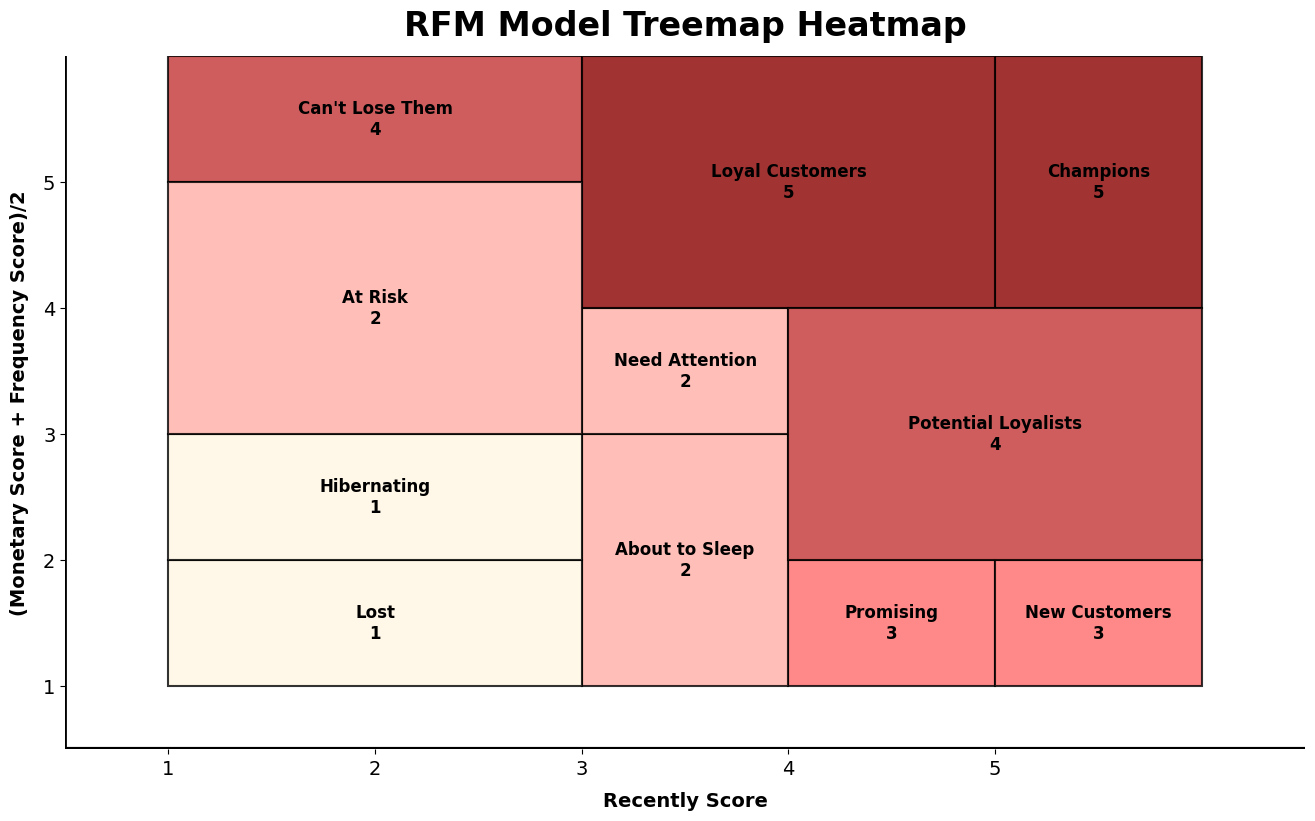

In [59]:
# แสดงตารางระดับคะแนน Segment ยิ่งสูง ยิ่งส่งผลต่อธุรกิจ จัดเรียงลำดับหใม่
styled_note("Level Segment : ⬇︎")
display(df_rfm3[["Segment", "Business_Impact"]
               ].drop_duplicates(
               ).sort_values("Business_Impact", ascending = False
               ).reset_index(drop=True))
segment_n1 = segment_n.copy() # copy table

# เปลี่ยนชื่อคอลัมน์ จาก No. Customers เป็น Segment Level
segment_n1.columns = ["Segment", "Segment Level"]

# เปลี่ยนแปลงค่าคอลัมน์ No. Customers ตาม Revenue Oppurtunity & Retention Oppurtunity
# Champions, Loyal Customers              | อยู่ระดับ 5
# Can't Lose Them, Potential Loyalists    | อยู่ระดับ 4
# New Customers, Promising                | อยู่ระดับ 3
# At Risk, About to Sleep, Need Attention | อยู่ระดับ 2
# Hibernating, Lost                       | อยู่ระดับ 1
segment_n1["Segment Level"] = np.where(segment_n1["Segment"] == "Champions", 5,
                  np.where(segment_n1["Segment"] == "Loyal Customers", 5,
                  np.where(segment_n1["Segment"] == "Can't Lose Them", 4,
                  np.where(segment_n1["Segment"] == "Potential Loyalists", 4,
                  np.where(segment_n1["Segment"] == "New Customers", 3,
                  np.where(segment_n1["Segment"] == "Promising", 3,
                  np.where(segment_n1["Segment"] == "Need Attention", 2,
                  np.where(segment_n1["Segment"] == "About to Sleep", 2,
                  np.where(segment_n1["Segment"] == "At Risk", 2,
                  np.where(segment_n1["Segment"] == "Hibernating", 1,
                  np.where(segment_n1["Segment"] == "Lost", 1, 0)))))))))))

# สร้าง dict ตั้งค่าขนาดของ Layout ของกล่องสี่เหลี่ยม
# (x, y, w, h)
# x แทนด้วย ตำแหน่งแนวนอนที่เราจะเอากล่องสี่เหลี่ยมไปวาง (หน่วย%)
# y แทนด้วย ตำแหน่งแนวตั้งที่เราจะเอากล่องสี่เหลี่ยมไปวาง (หน่วย%)
# w แทนด้วย ความกว้างแนวนอนของกล่อง (หน่วย%)
# h แทนด้วย ความสูงแนวแนวตั้งของกล่อง (หน่วย%)
layout_positions = {
    "At Risk"            : (0.00, 0.50, 0.50, 0.50),
    "About to Sleep"     : (0.50, 0.00, 0.25, 0.50),
    "Can't Lose Them"    : (0.00, 1.00, 0.50, 0.25),
    "Champions"          : (1.00, 0.75, 0.25, 0.50),
    "Hibernating"        : (0.00, 0.25, 0.50, 0.25),
    "Loyal Customers"    : (0.50, 0.75, 0.50, 0.50),
    "Lost"               : (0.00, 0.00, 0.50, 0.25),
    "Need Attention"     : (0.50, 0.50, 0.25, 0.25),
    "New Customers"      : (1.00, 0.00, 0.25, 0.25),
    "Potential Loyalists": (0.75, 0.25, 0.50, 0.50),
    "Promising"          : (0.75, 0.00, 0.25, 0.25),
}

# 📍 สำคัญ ถ้าหทกสมมติว่ามี DataFrame segment_n1 อาจถูกเรียงลำดับใหม่ จะมีการ map ค่าที่ผิดได้
# เพื่อความชัวร์ก่อนให้มัน map กัน เราควร(ตรวจสอบก่อนว่าคอลัมน์ Segment อยู่ใน segment_n1)
if "Segment" in segment_n1.columns:
    # จัดเรียง layout_positions ให้ตรงกับลำดับใน segment_n1
    layout_positions = {
        segment: layout_positions[segment] for segment in segment_n1["Segment"]
    }
else: # ถ้าไม่มีให้ข้อความตอน Error บอกว่า "คอลัมน์ 'Segment' ไม่พบใน segment_n1"
    raise KeyError("คอลัมน์ 'Segment' ไม่พบใน segment_n1")

# ตอนนี้ layout_positions คือ dictionary ที่เรียงตาม segment_n1 แล้ว
# สร้าง คอลอร์แมพ (colormap) แบบกำหนดสีเอง
# (ต่อ) ใช้ในกรณีที่อยากแสดงสีแบบไล่เฉดตามค่าตัวเลข โดยกำหนดสีไล่ระดับตามจำนวนลูกค้า (สีแซลม่อน)
# (ต่อ) กำหนดการไล่สีเองจาก list hex color ที่เป็นสไตล์แซลมอนตั้งชื่อ 3 แบบนี้ใน code
# (ต่อ) โดยตั้งชื่อการไล่สเกลนี้ว่า salmon_cmap และเก็บไว้ในตัวแปร salmon_cmap
salmon_cmap = LinearSegmentedColormap.from_list("salmon_cmap",
  ["#FFF5E1", "#FF6B6B", "#8B0000"])

# สร้างฟังก์ชันแปลงค่าที่อยู่ในคอลัมน์ Segment Level ให้กลายเป็น [0, 1] โดยเอาต่าต่ำสุด-สูงสุดมา normalize
norm = plt.Normalize(segment_n1["Segment Level"].min(), segment_n1["Segment Level"].max())

# สร้าง list สี ที่ถูกแมปมาจาก Segment Level นำคอลัมน์ Segment Level มาแปลงเป็น 0-1 map ไปที่เป็นกลายไล่ scale
# (ต่อ) สีที่สร้างมาคือ salmon_cmap
colors = salmon_cmap(norm(segment_n1["Segment Level"]))
# วาดแผนภาพ Layout พร้อมเพิ่มเส้นแกน x และ y
fig2, ax = plt.subplots(figsize=(16, 9))

# adjusted_layout_positions → เป็น dict ที่เก็บ layout ของแต่ละ Segment
adjusted_layout_positions = {
    key: (x * 4 + 1, y * 4 + 1, w * 4, h * 4)
    for key, (x, y, w, h) in layout_positions.items()
}

# adjusted_layout_positions.items() → ให้ tuple (segment_name, (x, y, w, h))
# colors → เป็น list สี ที่ถูกแมปมาจาก Segment Level
# segment_n1["Segment Level"] → จำนวนหรือคะแนนของ segment แต่ละอัน
# zip(...) → รวมเป็นชุดๆ เช่น
# (ต่อ) ("Champions", (0.1, 0.5, 0.3, 0.2)), "#FF6B6B", 9
# (ต่อ) ("Loyal", (0.5, 0.2, 0.3, 0.2)), "#FFBABA", 4

for (segment, (x, y, w, h)), color, count in zip(adjusted_layout_positions.items(), colors, segment_n1["Segment Level"]):
    # สร้าง Rectangle ที่ตำแหน่ง (x, y) ด้วยขนาด width=w และ height=h สีพื้นกล่องคือ facecolor=color (ที่ได้จาก colormap)
    # (ต่อ) เส้นขอบสีดำ alpha=0.8 → โปร่งแสงเล็กน้อย แล้ววาดลงบนกราฟด้วย ax.add_patch(...)
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor="black", facecolor=color, alpha=0.8)
    ax.add_patch(rect)
    # x + w/2, y + h/2 → วางข้อความไว้ ตรงกลางของกล่อง
    # (ต่อ) f"{segment}\n{count}" → แสดงชื่อ segment และจำนวน/คะแนนต่อกันใน 2 บรรทัด
    # (ต่อ) ha="center" และ va="center" → จัดข้อความให้อยู่กลางทั้งแนวนอนและแนวตั้ง
    # (ต่อ) ฟอนต์ขนาด 12 ตัวหนา สีดำ
    ax.text(x + w/2, y + h/2, f"{segment}\n{count}", ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# เพิ่มเส้นแกน x และ y
ax.axhline(y=0.5, color="black", linewidth=3.0)  # เส้นแกน x
ax.axvline(x=0.5, color="black", linewidth=2.0)  # เส้นแกน y
ax.set_xlim(0.5, 6.5) # กำหนด ช่วงของแกน X ให้เริ่มจาก 0 ถึง 1 เหมือน "ล็อกขอบเขต" ของกราฟให้แสดงเฉพาะพื้นที่ 0 ถึง 1 เท่านั้น (เพราะเรากำหนด latout เป็นแบบ เปอร์เซนต์)
ax.set_ylim(0.5, 6) # กำหนด ช่วงของแกน Y ให้เริ่มจาก 0 ถึง 1 เหมือน "ล็อกขอบเขต" ของกราฟให้แสดงเฉพาะพื้นที่ 0 ถึง 1 เท่านั้น (เพราะเรากำหนด latout เป็นแบบ เปอร์เซนต์)
ax.set_xticks([1,2,3,4,5]) # กำหนด เลขบนแกน x
ax.set_yticks([1,2,3,4,5]) # กำหนด เลขบนแกน y
ax.tick_params(axis="both", labelsize=14) # เพิ่มขนาดฟอนต์ของตัวเลขบนแกน
ax.set_xlabel("Recently Score", fontsize=14, fontweight="bold", labelpad=10) # ตั้งชื่อแกน x กำหนดขนาด 14px, ตัวหนา, ห่างจากเส้นขอบ 10px
ax.set_ylabel("(Monetary Score + Frequency Score)/2", fontsize=14, fontweight="bold", labelpad=10) # ตั้งชื่อแกน x กำหนดขนาด 14px, ตัวหนา, ห่างจากเส้นขอบ 10px
ax.set_frame_on(False) # ซ่อนกรอบรอบกราฟ (กรอบสี่เหลี่ยมที่ล้อม axes)

# ปรับตำแหน่ง Title ให้ชิด Chart มากขึ้น
plt.title("RFM Model Treemap Heatmap", fontsize=24, fontweight="bold", pad=15)

# แสดงแผนภาพ
styled_note("ในอุดมคิติ เราต้องการให้ Chart มีลักษณะแบบนี้มากที่สุด โดยพิจารณาจาก Revenue Oppurtunity & Retention Oppurtunity : ⬇︎")
display(fig2)
plt.close(fig2)



## **Viz-The RFM Model Chart Pattern Based on Our Data**


,Segment,No. Customers
0,Can't Lose Them,11
1,Promising,15
2,New Customers,22
3,Champions,53
4,About to Sleep,60
5,Need Attention,63
6,Lost,73
7,Loyal Customers,86
8,Hibernating,91
9,At Risk,141


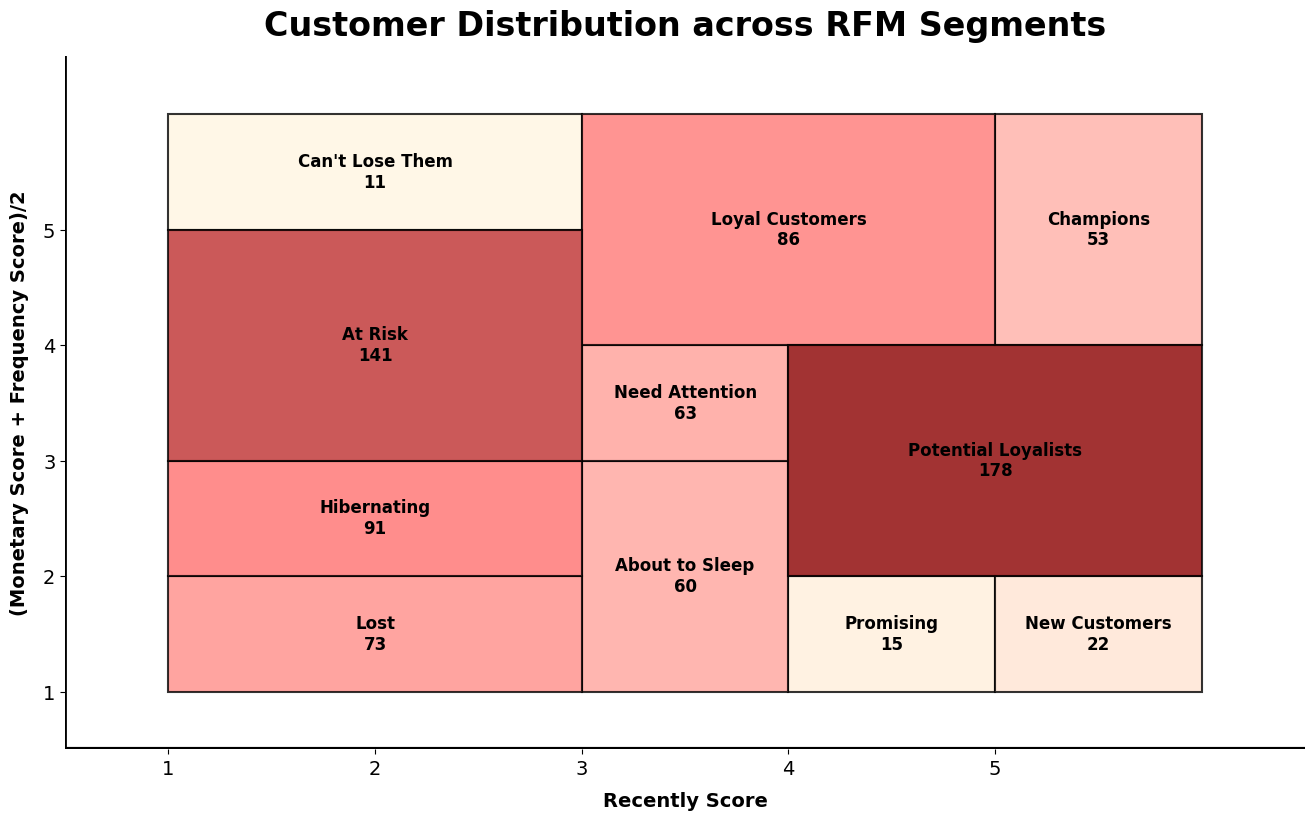

In [61]:
# แสดงตารางสรุปจำนวนลูกค้า ตาม Segment
styled_note("Customer Count. by Segment : ⬇︎")
display(segment_n.reset_index(drop=True))
# สร้าง dict ตั้งค่าขนาดของ Layout ของกล่องสี่เหลี่ยม
# (x, y, w, h)
# x แทนด้วย ตำแหน่งแนวนอนที่เราจะเอากล่องสี่เหลี่ยมไปวาง (หน่วย%)
# y แทนด้วย ตำแหน่งแนวตั้งที่เราจะเอากล่องสี่เหลี่ยมไปวาง (หน่วย%)
# w แทนด้วย ความกว้างแนวนอนของกล่อง (หน่วย%)
# h แทนด้วย ความสูงแนวแนวตั้งของกล่อง (หน่วย%)
layout_positions = {
    "At Risk"            : (0.00, 0.50, 0.50, 0.50),
    "About to Sleep"     : (0.50, 0.00, 0.25, 0.50),
    "Can't Lose Them"    : (0.00, 1.00, 0.50, 0.25),
    "Champions"          : (1.00, 0.75, 0.25, 0.50),
    "Hibernating"        : (0.00, 0.25, 0.50, 0.25),
    "Loyal Customers"    : (0.50, 0.75, 0.50, 0.50),
    "Lost"               : (0.00, 0.00, 0.50, 0.25),
    "Need Attention"     : (0.50, 0.50, 0.25, 0.25),
    "New Customers"      : (1.00, 0.00, 0.25, 0.25),
    "Potential Loyalists": (0.75, 0.25, 0.50, 0.50),
    "Promising"          : (0.75, 0.00, 0.25, 0.25),
}

# 📍 สำคัญ ถ้าหทกสมมติว่ามี DataFrame segment_n อาจถูกเรียงลำดับใหม่ จะมีการ map ค่าที่ผิดได้
# เพื่อความชัวร์ก่อนให้มัน map กัน เราควร(ตรวจสอบก่อนว่าคอลัมน์ Segment อยู่ใน segment_n)
if "Segment" in segment_n.columns:
    # จัดเรียง layout_positions ให้ตรงกับลำดับใน segment_n
    layout_positions = {
        segment: layout_positions[segment] for segment in segment_n["Segment"]
    }
else: # ถ้าไม่มีให้ข้อความตอน Error บอกว่า "คอลัมน์ 'Segment' ไม่พบใน segment_n"
    raise KeyError("คอลัมน์ 'Segment' ไม่พบใน segment_n")

# ตอนนี้ layout_positions คือ dictionary ที่เรียงตาม segment_n แล้ว
# สร้าง คอลอร์แมพ (colormap) แบบกำหนดสีเอง
# (ต่อ) ใช้ในกรณีที่อยากแสดงสีแบบไล่เฉดตามค่าตัวเลข โดยกำหนดสีไล่ระดับตามจำนวนลูกค้า (สีแซลม่อน)
# (ต่อ) กำหนดการไล่สีเองจาก list hex color ที่เป็นสไตล์แซลมอนตั้งชื่อ 3 แบบนี้ใน code
# (ต่อ) โดยตั้งชื่อการไล่สเกลนี้ว่า salmon_cmap และเก็บไว้ในตัวแปร salmon_cmap
salmon_cmap = LinearSegmentedColormap.from_list("salmon_cmap",
  ["#FFF5E1", "#FF6B6B", "#8B0000"])

# สร้างฟังก์ชันแปลงค่าที่อยู่ในคอลัมน์ No. Customers ให้กลายเป็น [0, 1] โดยเอาต่าต่ำสุด-สูงสุดมา normalize
norm = plt.Normalize(segment_n["No. Customers"].min(), segment_n["No. Customers"].max())

# สร้าง list สี ที่ถูกแมปมาจาก No. Customers นำคอลัมน์ No. Customers มาแปลงเป็น 0-1 map ไปที่เป็นกลายไล่ scale
# (ต่อ) สีที่สร้างมาคือ salmon_cmap
colors = salmon_cmap(norm(segment_n["No. Customers"]))
# วาดแผนภาพ Layout พร้อมเพิ่มเส้นแกน x และ y
fig3, ax = plt.subplots(figsize=(16, 9))

# adjusted_layout_positions → เป็น dict ที่เก็บ layout ของแต่ละ Segment
adjusted_layout_positions = {
    key: (x * 4 + 1, y * 4 + 1, w * 4, h * 4)
    for key, (x, y, w, h) in layout_positions.items()
}

# adjusted_layout_positions.items() → ให้ tuple (segment_name, (x, y, w, h))
# colors → เป็น list สี ที่ถูกแมปมาจาก No. Customers
# segment_n["No. Customers"] → จำนวนหรือคะแนนของ segment แต่ละอัน
# zip(...) → รวมเป็นชุดๆ เช่น
# (ต่อ) ("Champions", (0.1, 0.5, 0.3, 0.2)), "#FF6B6B", 9
# (ต่อ) ("Loyal", (0.5, 0.2, 0.3, 0.2)), "#FFBABA", 4

for (segment, (x, y, w, h)), color, count in zip(adjusted_layout_positions.items(), colors, segment_n["No. Customers"]):
    # สร้าง Rectangle ที่ตำแหน่ง (x, y) ด้วยขนาด width=w และ height=h สีพื้นกล่องคือ facecolor=color (ที่ได้จาก colormap)
    # (ต่อ) เส้นขอบสีดำ alpha=0.8 → โปร่งแสงเล็กน้อย แล้ววาดลงบนกราฟด้วย ax.add_patch(...)
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor="black", facecolor=color, alpha=0.8)
    ax.add_patch(rect)
    # x + w/2, y + h/2 → วางข้อความไว้ ตรงกลางของกล่อง
    # (ต่อ) f"{segment}\n{count}" → แสดงชื่อ segment และจำนวน/คะแนนต่อกันใน 2 บรรทัด
    # (ต่อ) ha="center" และ va="center" → จัดข้อความให้อยู่กลางทั้งแนวนอนและแนวตั้ง
    # (ต่อ) ฟอนต์ขนาด 12 ตัวหนา สีดำ
    ax.text(x + w/2, y + h/2, f"{segment}\n{count}", ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# เพิ่มเส้นแกน x และ y
ax.axhline(y=0.5, color="black", linewidth=3.0)  # เส้นแกน x
ax.axvline(x=0.5, color="black", linewidth=2.0)  # เส้นแกน y
ax.set_xlim(0.5, 6.5) # กำหนด ช่วงของแกน X ให้เริ่มจาก 0 ถึง 1 เหมือน "ล็อกขอบเขต" ของกราฟให้แสดงเฉพาะพื้นที่ 0 ถึง 1 เท่านั้น (เพราะเรากำหนด latout เป็นแบบ เปอร์เซนต์)
ax.set_ylim(0.5, 6.5) # กำหนด ช่วงของแกน Y ให้เริ่มจาก 0 ถึง 1 เหมือน "ล็อกขอบเขต" ของกราฟให้แสดงเฉพาะพื้นที่ 0 ถึง 1 เท่านั้น (เพราะเรากำหนด latout เป็นแบบ เปอร์เซนต์)
ax.set_xticks([1,2,3,4,5]) # กำหนด เลขบนแกน x
ax.set_yticks([1,2,3,4,5]) # กำหนด เลขบนแกน y
ax.tick_params(axis="both", labelsize=14) # เพิ่มขนาดฟอนต์ของตัวเลขบนแกน
ax.set_xlabel("Recently Score", fontsize=14, fontweight="bold", labelpad=10) # ตั้งชื่อแกน x กำหนดขนาด 14px, ตัวหนา, ห่างจากเส้นขอบ 10px
ax.set_ylabel("(Monetary Score + Frequency Score)/2", fontsize=14, fontweight="bold", labelpad=10) # ตั้งชื่อแกน x กำหนดขนาด 14px, ตัวหนา, ห่างจากเส้นขอบ 10px
ax.set_frame_on(False) # ซ่อนกรอบรอบกราฟ (กรอบสี่เหลี่ยมที่ล้อม axes)

# ปรับตำแหน่ง Title ให้ชิด Chart มากขึ้น
plt.title("Customer Distribution across RFM Segments", fontsize=24, fontweight="bold", pad=15)

# แสดงแผนภาพ
styled_note("วิเคราะห์การกระจายตัวของกลุ่มลูกค้าว่ามีจำนวนเท่าไร : ⬇︎")
display(fig3) # แสดง Chart
plt.close(fig3) # ป้องกันการ plot ซ้ำ


## **Summary RFM Python**

,Customer Name,Recently (Days),Frequency,Monetary
0,Aaron Bergman,416,3,295.385333
1,Aaron Hawkins,12,7,249.242857
2,Aaron Smayling,88,7,435.813143
3,Adam Bellavance,54,8,1107.945714
4,Adam Hart,34,10,325.033700
...,...,...,...,...
788,Xylona Preis,43,11,296.832250
789,Yana Sorensen,9,8,840.055500
790,Yoseph Carroll,4,5,1090.870000
791,Zuschuss Carroll,54,13,891.745222


,Recently (Days),Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,146.916772,6.316520,497.350529
std,186.393206,2.550885,456.307968
min,0.000000,1.000000,2.416500
25%,30.000000,5.000000,234.079143
50%,75.000000,6.000000,387.090286
75%,183.000000,8.000000,620.122400
max,1165.000000,17.000000,5008.610000
skew,2.272914,0.362409,3.670047
kurtosis,5.795721,-0.025969,22.645064


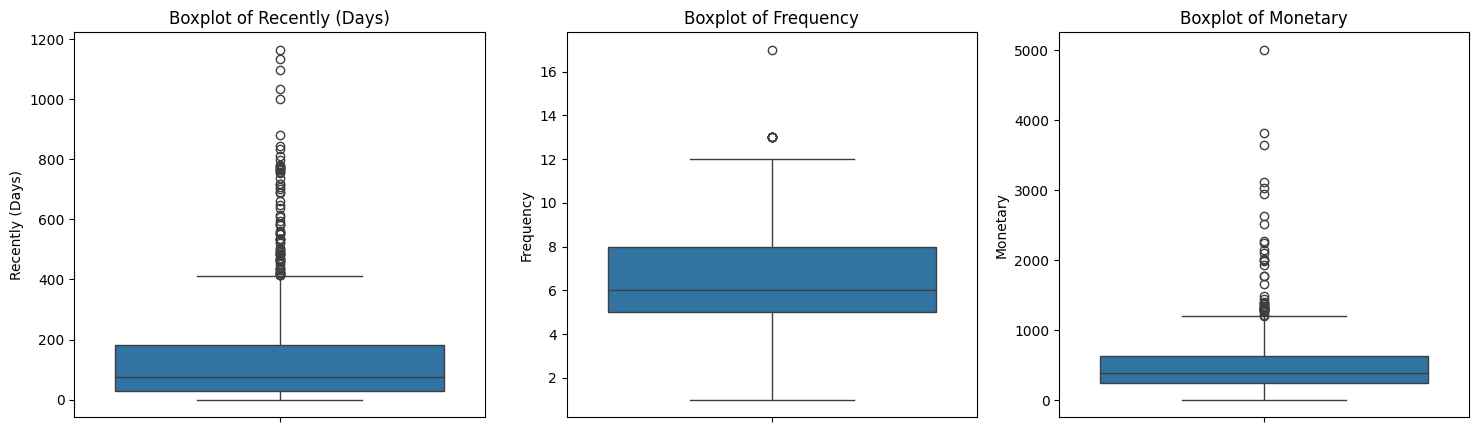

{'Recently (Days)': 'Right-skewed (Percentile is better)',
 'Frequency': 'Normal distribution (Quartile is fine)',
 'Monetary': 'Right-skewed (Percentile is better)'}

,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5
4,Adam Hart,34,10,325.033700,4,5,3,4.0
...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0


,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Impact
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5,Lost,1
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5,Potential Loyalists,4
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0,Need Attention,2
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5,Loyal Customers,5
4,Adam Hart,34,10,325.033700,4,5,3,4.0,Loyal Customers,5
...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5,Potential Loyalists,4
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5,Champions,5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5,Potential Loyalists,4
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0,Loyal Customers,5


,Segment,No. Customers
0,Can't Lose Them,11
1,Promising,15
2,New Customers,22
3,Champions,53
4,About to Sleep,60
5,Need Attention,63
6,Lost,73
7,Loyal Customers,86
8,Hibernating,91
9,At Risk,141


,index,Segment,Business_Impact
0,3,Loyal Customers,5
1,13,Champions,5
2,1,Potential Loyalists,4
3,45,Can't Lose Them,4
4,8,Promising,3
5,33,New Customers,3
6,2,Need Attention,2
7,16,At Risk,2
8,7,About to Sleep,2
9,0,Lost,1


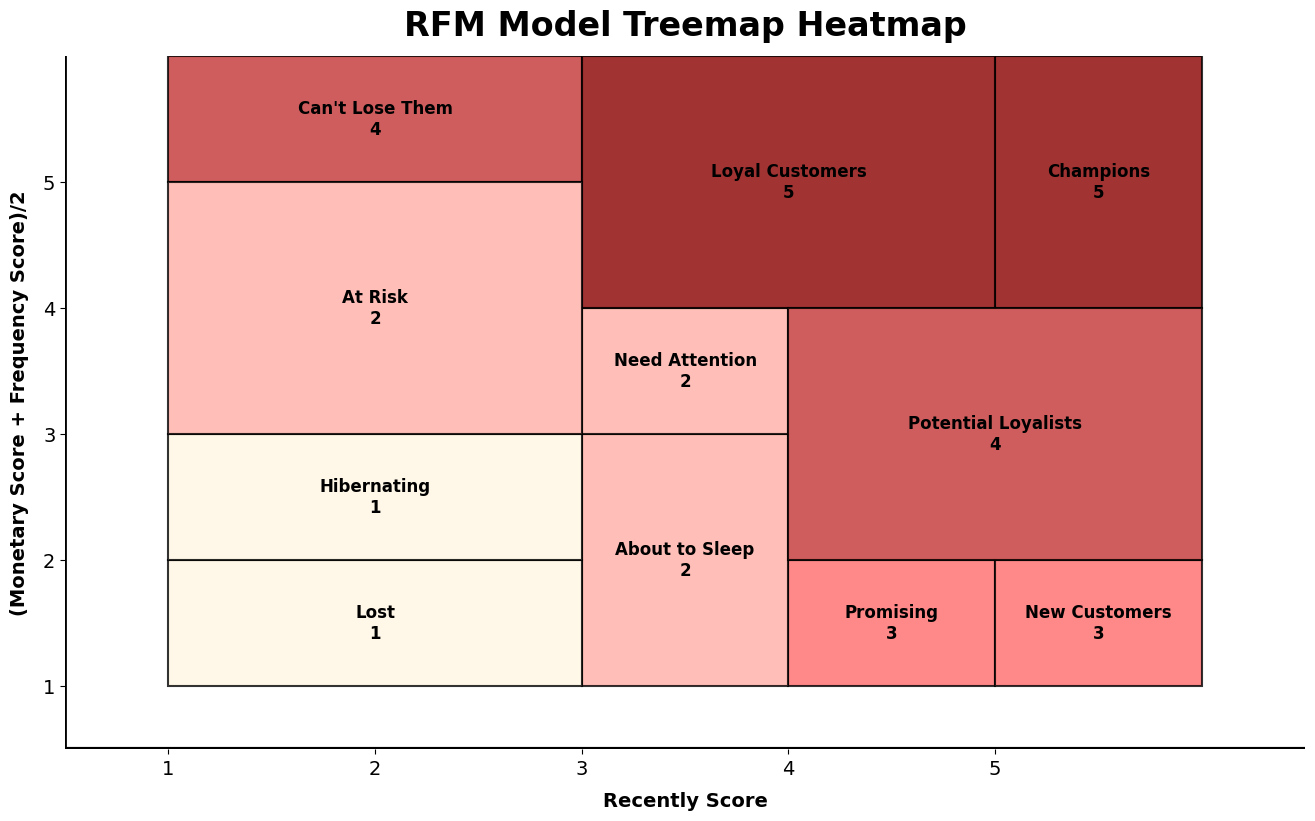

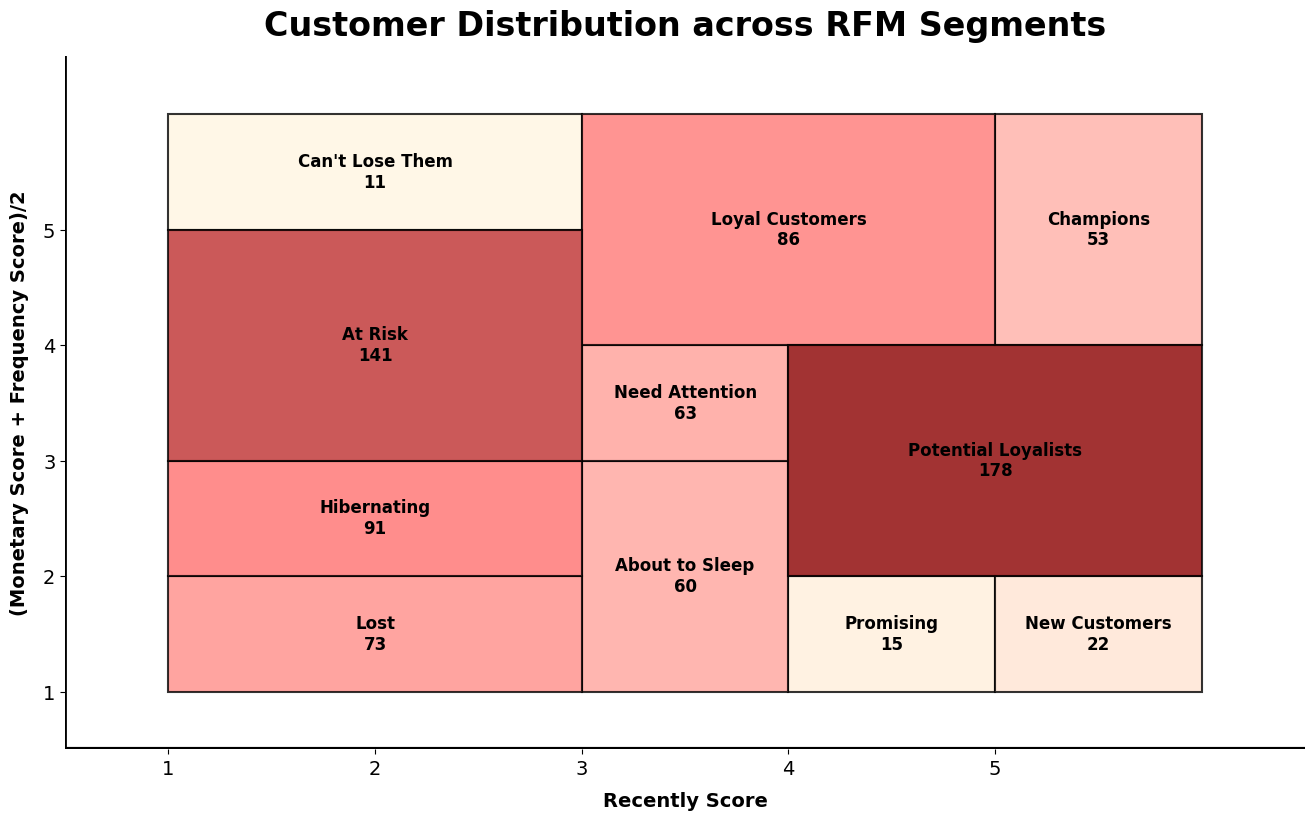

In [27]:
# code เหล่านี้มาจากด้านบน แค่นำมาสรุปเฉยๆ (อยากให้ดู clean และเน้นมองผลลัพธ์มากกว่าอ่าน code)

# Calculate/Manage Data
styled_note("ตารางดูพฤติกรรมลูกค้า : ⬇︎")
display(df_rfm1)

styled_note("สรุปค่าสถิติ RFM : ⬇︎")
display(rfm_stats)

styled_note("แสดงกราฟ Boxplot ทั้ง 3 แท่ง : ⬇︎")
display(fig1)
plt.close(fig1)

styled_note("ข้อมูลตัดสินใจการแบ่งกลุ่มลูกค้า : ⬇︎")
display(decisions)

styled_note("เพิ่ม RFM-Score Columns : ⬇︎")
display(df_rfm2)

styled_note("RFM Table Final : ⬇︎")
display(df_rfm3)

# Summarise Data
styled_note("Customer Count. by Segment : ⬇︎")
display(segment_n)

styled_note("Level Segment : ⬇︎")
display(df_rfm3[["Segment", "Business_Impact"]
               ].drop_duplicates(
               ).sort_values("Business_Impact", ascending = False
               ).reset_index())

# Visualize Data
styled_note("ในอุดมคิติ เราต้องการให้ Chart มีลักษณะแบบนี้มากที่สุด โดยพิจารณาจาก Revenue Oppurtunity & Retention Oppurtunity : ⬇︎")
display(fig2)
plt.close(fig2)

styled_note("วิเคราะห์การกระจายตัวของกลุ่มลูกค้าว่ามีจำนวนเท่าไร : ⬇︎")
display(fig3)
plt.close(fig3)


# **Exploratory Sales & Customer Analysis (2017–2020)**

## **Export Customer Data in California (CSV Format)**

In [28]:
# นำ df ที่เป็น tidy data ที่เตรียมไว้ก่อนหน้ามากรองที่อยู่ในการจัดส่งลูกค้าไปที่ Califonia
df_california = df.query("State == 'California'")

# Export ข้อมูล
df_california.to_csv("data_california.csv")

styled_note("นำข้อมูลลูกค้าที่อยู่ State Califonia ส่งไปให้เพื่อนร่วมงาน : ⬇︎ (ชื่อไฟล์ : data_california.csv)") # mark note
display(df_california) # แสดงผล

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
5,6,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2019-125794,2019-09-29,2019-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


## **Export Order Data (CSV): Customers in California and Texas, 2017**

Note : ต้องเปลี่ยนชื่อคอลัมน์จาก Order Date เป็น Order_Date เนื่องจาก มันมมีเว้นวนนคตอน query data

In [29]:
df1 = df.copy() # copy tidy data ที่สร้างไว้ในขั้นตอนที่ผ่านมา เพื่อนำไปคำนวณใน section นี้

# 1.เปลี่ยนขื่อคอลัมน์ทั้งหมด (เลือกเฉพาะบางคอลัมน์ได้ สามารถดูชื่อคอลัมน์ได้ด้วยคำสั่ง `df1.columns`)
df1.columns = ['Row ID', 'Order ID', 'Order_Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'] # กำหนดชื่อคอลัมน์ทั้งหมดใหม่เป็นชื่อนี้ ลำดับกับจำนวนคอลัมน์ต้องเท่าเดิมด้วย

# 2.เปลี่ยนเฉพาะบางคอลัมน์ (ทั้งสองแบบเลือกใช้ตามถนัด)
df1.rename(columns={'Order Date': 'Order_Date'}, inplace = True)

# เก็บตาราง df_cali_tex_2017 ที่กรองที่อยู้ในการจัดส่งลูกค้าไปที่ California, Texas ส่งภายในปี 2017
df_cali_tex_2017 = df1.query("State in ['California', 'Texas'] & Order_Date.dt.year == 2017")

# Export df_cali_tex_2017
df_cali_tex_2017.to_csv("df_cali_tex_2017.csv")

# mark note
styled_note("ข้อมูลลูกค้าที่สั่งในปี 2017 ส่งที่ไปสินค้าไปยัง California, Texas นำส่งไปให้เพื่อนร่วมงาน : ⬇︎ (ชื่อไฟล์ : df_cali_tex_2017.csv)")

display(df_cali_tex_2017.head()) # แสงผลลัพธ์

# ------------------------------------------------------------------------------------------------------------------------------------------------
# ทั้ง 2 lines ผลลัพธ์เหมือน line 13 สามารถเลือกใช้ได้ตามที่ถนัด
df1.query("State in ['California', 'Texas']").query("Order_Date >= '2017-01-01' & Order_Date <= '2017-12-31'")
df1.query("State in ['California', 'Texas'] & Order_Date >= '2017-01-01' & Order_Date <= '2017-12-31'")


,Row ID,Order ID,Order_Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5,6,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


,Row ID,Order ID,Order_Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5,6,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,9886,CA-2017-112291,2017-04-03,2017-04-08,Standard Class,KE-16420,Katrina Edelman,Corporate,United States,Los Angeles,California,West,TEC-AC-10000736,Technology,Accessories,Logitech G600 MMO Gaming Mouse,159.980,2,0.0,57.5928
9903,9904,CA-2017-122609,2017-11-12,2017-11-18,Standard Class,DP-13000,Darren Powers,Consumer,United States,Carrollton,Texas,Central,FUR-FU-10004587,Furniture,Furnishings,"GE General Use Halogen Bulbs, 100 Watts, 1 Bul...",25.128,3,0.6,-6.9102
9904,9905,CA-2017-122609,2017-11-12,2017-11-18,Standard Class,DP-13000,Darren Powers,Consumer,United States,Carrollton,Texas,Central,TEC-AC-10002567,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,127.984,2,0.2,25.5968
9942,9943,CA-2017-143371,2017-12-28,2018-01-03,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Anaheim,California,West,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.820,9,0.0,29.9646


## **Sales Analysis 2017: Total, Average, and Standard Deviation by Month, Day, and Order**


In [30]:
# สร้างตารางเก็บข้อมูลที่ลูกค้าสั่งซื้อภายในปี 2017 (Note: คำสั่ง `between()` รวมขอบล่างขอบบนด้วย) มีวิธี query 3 แบบ
df_2017 = df1[df1["Order_Date"].between("2017-01-01", "2017-12-31")
              ].reset_index(drop = True)
df_2017 = df1[df1["Order_Date"].dt.year == 2017] # ผลลัพธ์เหมือน line 2
df_2017 = df1.query("Order_Date.dt.year == 2017") # ผลลัพธ์เหมือน line 2

# คำนวณยอดขายโดยเฉลี่ยต่อ(เดือน) ภายในปี 2017
df_2017_stat_month = df_2017.groupby(df_2017["Order_Date"].dt.to_period("M"))["Sales"].sum() \
                      .agg(["sum", "mean", "std"])

# คำนวณยอดขายโดยเฉลี่ยต่อ(วัน) ภายในปี 2017
df_2017_stat_day = df_2017.groupby("Order_Date")["Sales"].sum() \
  .agg(["sum", "mean", "std"])

# คำนวณยอดขายโดยเฉลี่ยต่อ(ออเดอร์) ภายในปี 2017
df_2017_stat_order = df_2017.groupby("Order ID")["Sales"].sum() \
  .agg(["sum", "mean", "std"])

styled_note("ปี 2017 ยอดขายเฉลี่ยต่อเดือน : ⬇︎")
display(df_2017_stat_month) # แสดงผล

styled_note("ปี 2017 ยอดขายเฉลี่ยต่อวัน : ⬇︎")
display(df_2017_stat_day) # แสดงผล

styled_note("ปี 2017 ยอดขายเฉลี่ยต่อออเดอร์ : ⬇︎")
display(df_2017_stat_order) # แสดงผล


,Sales
sum,484247.498100
mean,40353.958175
std,25167.096426


,Sales
sum,484247.498100
mean,1587.696715
std,2526.285166


,Sales
sum,484247.498100
mean,499.739420
std,1172.998523


## **Highest Profit Segment in 2018**

In [31]:
# ผลรวมกำไรในปี 2018 แบ่งตาม Segment เรียงจากมากไปน้อย
df_2018_highest_profit_segment = df1.query("Order_Date.dt.year == 2018") \
                                  .groupby("Segment")["Profit"] \
                                  .sum() \
                                  .sort_values(ascending = False).reset_index()

styled_note("Segment ที่สร้างกำไรสูงที่สุดในปี 2018 : ⬇︎")
display(df_2018_highest_profit_segment) # แสดงผล


,Segment,Profit
0,Consumer,28460.1665
1,Corporate,20688.3248
2,Home Office,12470.1124


## **Top 5 States with the Lowest Total Sales (15 April – 31 December 2019)**

In [32]:
# กรองข้อมูลลูกค้าตั้งแต่วันที่ 15 Apr 2019 ไม่เกินวันที่ 31 Dec 2019
df_15apr_31dec_2019 = df1[df1["Order_Date"].between("2019-04-15", "2019-12-31")]

# Aggregate ยอดขายรวมแบ่งตาม Segment และเรียงลำดับจากน้อยไปมาก โดยเลือกมา 5 รัฐบนสุด
top5_lowest_sales = df_15apr_31dec_2019.groupby("State")["Sales"].sum() \
                    .sort_values() \
                    .head(5).reset_index()

styled_note("Top 5 ยอดขายรวมที่น้อยที่สุดในแต่ละ State (15 April – 31 December 2019) : ⬇︎")
display(top5_lowest_sales)


,State,Sales
0,New Hampshire,49.05
1,New Mexico,64.08
2,District of Columbia,117.07
3,Louisiana,249.80
4,South Carolina,502.48


## **Sales Proportion (%) in West and Central Regions, 2019**


In [33]:
# สร้างตารางเก็บข้อมูลลูกค้าปี 2019
df_2019 = df1.query("Order_Date.dt.year == 2019")

# สร้างตารางเก็บข้อมูลลูกค้าที่ส่งไปของไปยังภูมิภาค West และ Central ในปี 2019
df_west_central = df1.query("Region in ['West', 'Central'] & Order_Date.dt.year == 2019")

# คำนวณสัดส่วน ยอดขายรวมของ west, central total sale 2019 vs. total sale 2019
proportion_west_central_sales_vs_total_sales = (df_west_central["Sales"].sum() / df_2019["Sales"].sum()) * 100

styled_note("Sales Proportion (%) in West and Central Regions, 2019 : ⬇︎")
display(proportion_west_central_sales_vs_total_sales)


np.float64(54.97479891837763)

## **Top 10 Products by Order Volume vs. Total Sales (2019–2020)**

In [34]:
# สร้างตารางข้อมูลลูกค้าที่สั่งสินค้าปี 2019 และ ปี 2020
df_19_20 = df1.query("Order_Date >= '2019-01-01' and Order_Date <= '2020-12-31'")

# คำนวณค่าสถิติของสินค้า ยอดขายรวม(Total_Sales), จำนวนครั้งที่ลูกค้าซื้อสินค้าตัวนั้น(No. Order), ยอดขายรวมโดยเฉลี่ยต่อครั้ง(Avg)
product_avg_sales = df_19_20.groupby("Product Name")[["Sales"]].agg(["sum", "count", "mean"]).reset_index()

# เปลี่ยนชื่อคอลัมน์
product_avg_sales.columns = ["Product Name", "Total_Sales", "No. Order", "Avg"] # df.columns.droplevel(0) ได้เหมือนกัน

# Top 10 ยอดขายโดยเฉลี่ยต่อครั้ง (Avg) โดยเรียงลำดับจากมากไปน้อย
styled_note("Top 10 ยอดขายสินค้ารวมโดยเฉลี่ยต่อครั้ง ที่สั่งซื้อภายในปี 2019 และ 2020 : ⬇︎")
product_avg_sales.sort_values("Avg", ascending = False).head(10).reset_index(drop = True)


,Product Name,Total_Sales,No. Order,Avg
0,Canon imageCLASS 2200 Advanced Copier,61599.824,5,12319.9648
1,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,1,8749.9500
2,Cubify CubeX 3D Printer Triple Head Print,7999.980,1,7999.9800
3,"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,2,7149.9450
4,Ativa V4110MDD Micro-Cut Shredder,4899.930,1,4899.9300
5,Cubify CubeX 3D Printer Double Head Print,9299.969,2,4649.9845
6,High Speed Automatic Electric Letter Opener,8842.662,2,4421.3310
7,Okidata MB760 Printer,7834.400,2,3917.2000
8,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,3404.500,1,3404.5000
9,Ibico EPK-21 Electric Binding System,6425.966,2,3212.9830


## **Visual Insights: At Two Plots**

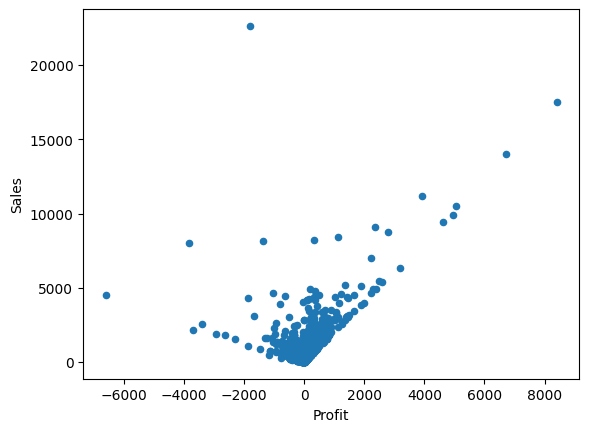

In [35]:
# scatter plot chart ดู correlation ระหว่าง Profit(x) vs. Sales(y)
styled_note("correlation ระหว่าง Profit(x) vs. Sales(y) : ⬇︎")
scatter_chart = df[["Profit", "Sales"]].plot(x = "Profit", y = "Sales", kind = "scatter")


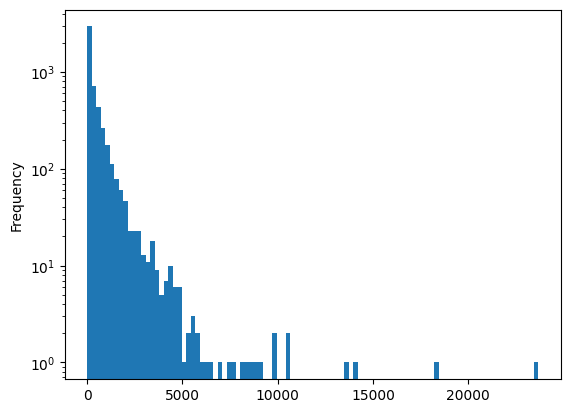

In [36]:
# plot histogram chart เพื่อดูว่าส่วนใหญ่แล้ว ยอดขายแต่ละช่วงกระจุกตัวอยู่ที่ลูกค้าจำนวนครั้งที่ซื้อมากน้อยแต่ไหน
styled_note("histogram chart ยอดขายแต่ละช่วงกระจุกตัวอยู่ที่จำนวนครั้งที่ลูกค้าซื้อมากน้อยแต่ไหน : ⬇︎")
hitrogram_chart = df.groupby("Order ID")["Sales"
                                        ].sum().reset_index(
                                        )["Sales"
                                        ].plot(kind = "hist", bins = 100, log = True)


## Summary Exploratory Sales & Customer Analysis (2017-2020)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
5,6,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2019-125794,2019-09-29,2019-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


,Row ID,Order ID,Order_Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5,6,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2017-115812,2017-06-09,2017-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


,Sales
sum,484247.498100
mean,40353.958175
std,25167.096426


,Sales
sum,484247.498100
mean,1587.696715
std,2526.285166


,Sales
sum,484247.498100
mean,499.739420
std,1172.998523


,Segment,Profit
0,Consumer,28460.1665
1,Corporate,20688.3248
2,Home Office,12470.1124


,State,Sales
0,New Hampshire,49.05
1,New Mexico,64.08
2,District of Columbia,117.07
3,Louisiana,249.80
4,South Carolina,502.48


np.float64(54.97479891837763)

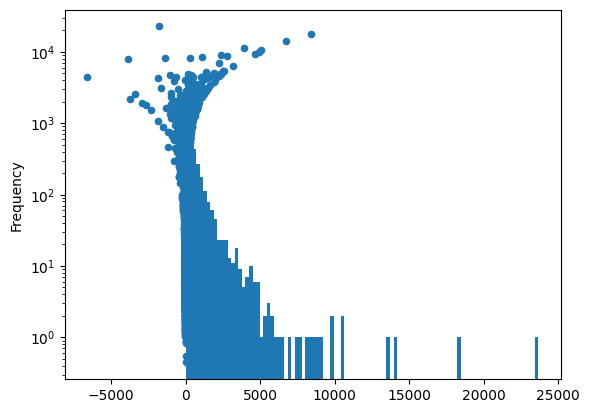

In [37]:
styled_note("นำข้อมูลลูกค้าที่อยู่ State Califonia ส่งไปให้เพื่อนร่วมงาน : ⬇︎ (ชื่อไฟล์ : data_california.csv)") # mark note
display(df_california) # แสดงผล

styled_note("ข้อมูลลูกค้าที่สั่งในปี 2017 ส่งที่ไปสินค้าไปยัง California, Texas นำส่งไปให้เพื่อนร่วมงาน : ⬇︎ (ชื่อไฟล์ : df_cali_tex_2017.csv)")
display(df_cali_tex_2017.head()) # แสงผลลัพธ์

styled_note("ปี 2017 ยอดขายเฉลี่ยต่อเดือน : ⬇︎")
display(df_2017_stat_month) # แสดงผล

styled_note("ปี 2017 ยอดขายเฉลี่ยต่อวัน : ⬇︎")
display(df_2017_stat_day) # แสดงผล

styled_note("ปี 2017 ยอดขายเฉลี่ยต่อออเดอร์ : ⬇︎")
display(df_2017_stat_order) # แสดงผล

styled_note("Segment ที่สร้างกำไรสูงที่สุดในปี 2018 : ⬇︎")
display(df_2018_highest_profit_segment) # แสดงผล

styled_note("Top 5 ยอดขายรวมที่น้อยที่สุดในแต่ละ State (15 April – 31 December 2019) : ⬇︎")
display(top5_lowest_sales) # แสดงผล

styled_note("Sales Proportion (%) in West and Central Regions, 2019 : ⬇︎")
display(proportion_west_central_sales_vs_total_sales) # แสดงผล

styled_note("Top 10 ยอดขายสินค้ารวมโดยเฉลี่ยต่อครั้ง ที่สั่งซื้อภายในปี 2019 และ 2020 : ⬇︎")
product_avg_sales.sort_values("Avg", ascending = False).head(10).reset_index(drop = True) # แสดงผล

styled_note("correlation ระหว่าง Profit(x) vs. Sales(y) : ⬇︎")
scatter_chart = df[["Profit", "Sales"]].plot(x = "Profit", y = "Sales", kind = "scatter") # แสดงผล

styled_note("histogram chart ยอดขายแต่ละช่วงกระจุกตัวอยู่ที่จำนวนครั้งที่ลูกค้าซื้อมากน้อยแต่ไหน : ⬇︎")
hitrogram_chart = df.groupby("Order ID")["Sales"
                                        ].sum().reset_index(
                                        )["Sales"
                                        ].plot(kind = "hist", bins = 100, log = True) # แสดงผล


# **RFM Analysis Using R**


## Set R

In [38]:
# ติดตั้ง rpy2 (ต้องรันเสมอเมื่อเปิด notebook ใหม่)
!pip install -q rpy2

# โหลด R magic โหลดเพื่อไว้รัน R ได้โดยไม่ต้องเปลี่ยนประเภท Runtime
%load_ext rpy2.ipython


## Import Library

📍 **แนะนำ** : ถ้าเปิด RStudio หรือ Google Colab ครั้งแรก จะต้องติดตั้ง library ก่อนด้วยคำสั่ง

```
%%R
install.packages("tidyverse")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("data.table")
install.packages("scales")
```

In [39]:
%%R
# tidyverse – รวมเครื่องมือสำหรับการจัดการและวิเคราะห์ข้อมูล เช่น dplyr, ggplot2, tidyr ฯลฯ
# lubridate – ใช้จัดการวันที่และเวลา เช่น แปลงรูปแบบวัน, ดึงปี/เดือน/วัน
# ggplot2 – ใช้สร้างกราฟและภาพข้อมูลแบบสวยงามและยืดหยุ่น
# data.table – ใช้จัดการข้อมูลที่มีขนาดใหญ่ได้เร็วและมีประสิทธิภาพ
# scales – ช่วยปรับรูปแบบแกนกราฟ เช่น ใส่ %, สกุลเงิน, หรือรูปแบบตัวเลขใน ggplot2
# รายชื่อแพ็กเกจที่ต้องใช้
packages <- c("tidyverse", "lubridate", "ggplot2", "data.table", "scales")

# ตรวจสอบว่าแพ็กเกจไหนยังไม่ได้ติดตั้ง
missing_packages <- packages[!sapply(packages, requireNamespace, quietly = TRUE)]

# ถ้ามีแพ็กเกจที่ยังไม่ได้ติดตั้ง ให้ติดตั้ง
# requireNamespace(): เป็นฟังก์ชันที่ใช้ตรวจสอบว่า แพ็กเกจมีการติดตั้งไว้แล้วหรือไม่ (TRUE, FALSE)
# quietly = TRUE หมายถึง ให้ทำงานแบบเงียบ ๆ ไม่ต้องแสดงข้อความใด ๆ
if (length(missing_packages) > 0) {
  message("พบว่ามี library บางตัวที่ยังไม่ได้ติดตั้ง กำลังติดตั้งให้นะครับ...\n")
  install.packages(missing_packages, repos = "https://cloud.r-project.org/") # ที่อยู่ในการดาวน์โหลด
  message("✅ ผมพึ่งติดตั้ง library ที่เกี่ยวข้องทั้งหมดให้คุณไปแล้วครับ อ่านโค้ดให้สนุก!")
} else {
  message("✅ library ทั้งหมดถูกติดตั้งไว้อยู่แล้วครับ เชิญอ่าน code ให้สนุก !")
}

# โหลดทุกแพ็กเกจ
# lapply(): เป็นฟังก์ชันที่ใช้วนลูปผ่านสมาชิกของเวกเตอร์ แล้วใช้ฟังก์ชันกับแต่ละตัว lapply() จะคืนค่าผลลัพธ์เป็น list
# character.only = TRUE: เป็นออปชันที่บอกว่าให้ใช้ค่าที่ส่งเข้ามาเป็น ชื่อของแพ็กเกจ (string) ไม่ใช่ชื่อวัตถุ
# (ต่อ) โหลดแพ็กเกจทั้งหมดในเวกเตอร์ packages ทีละตัว โดยใช้ library()
# (ต่อ) ทำให้สามารถโหลดแพ็กเกจด้วยชื่อในรูปแบบ string ได้ (ถ้าไม่ขึ้น error แสดงว่า library ถูกเรียกใช้งานได้อย่างถูกต้องแล้ว)
invisible(lapply(packages, library, character.only = TRUE))


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


✅ library ทั้งหมดถูกติดตั้งไว้อยู่แล้วครับ เชิญอ่าน code ให้สนุก !
data.table 1.17.0 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

Attaching package: ‘data.table’

The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



## Import Tidy Data


In [40]:
%%R

# อ่านข้อมูลจาก CSV ที่ export มาจาก clean python (tidy data)
df <- read_csv("tidy-data.csv")


Rows: 9994 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): Order ID, Ship Mode, Customer ID, Customer Name, Segment, Country...
dbl   (5): Row ID, Sales, Quantity, Discount, Profit
date  (2): Order Date, Ship Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## **Create an RFM table to analyze customer purchasing behavior**

In [41]:
%%R
# Create an RFM
# ตั้งชื่อคอลัมน์ใหม่โดยเป็นแบบ Sneak Case
colnames(df) <- c("Row_ID", "Order_ID", "Order_Date", "Ship_Date", "Ship_Mode",
                  "Customer_ID", "Customer_Name", "Segment", "Country_Region",
                  "City", "State", "Region", "Product_ID",
                  "Category", "Sub_Category", "Product_Name", "Sales",
                  "Quantity", "Discount", "Profit")

# คำนวณ Monetary :
# m1 = ยอดขายรวมของแต่ละลูกค้า
# คำนวณยอดขายรวมจัดกลุ่มตามชื่อลูกค้า โดยลบ NaN ก่อนคำนวณ
m1 <- df %>%
  group_by(Customer_Name) %>%
  summarise(total_sales = sum(Sales, na.rm = TRUE))

# m2 = นับจำนวนเดือนที่มีการสั่งซื้อ (unique month)
m2 <- df %>%
  group_by(Customer_Name) %>%
  summarise(unique_months = n_distinct(format(Order_Date, "%Y-%m")))

# เอา m1, m2 มา join กันด้วยชื่อลูกค้า และสร้างคอลัมน์เแลี่ยต่อเดือนที่ลูกค้าซื้อ
behavior_customers <- left_join(m1, m2, by = "Customer_Name") %>%
  mutate(Monetary = total_sales / unique_months) %>%
  select(Customer_Name, Monetary)

# คำนวณ Frequency (จํานวน Order_ID ที่ไม่ซ้ำ)
f1 <- df %>%
  group_by(Customer_Name) %>%
  summarise(Frequency = n_distinct(Order_ID))

# จำนวน Monetary กับ Frequecy มา join กันด้วยชื่อลูกค้า
behavior_customers <- left_join(behavior_customers, f1, by = "Customer_Name")

# คำนวณ Recency (จำนวนวันจากการสั่งซื้อล่าสุดของลูกค้าไปจนถึงวันที่สั่งซื้อสุดท้ายในฐานข้อมูล)
r1 <- df %>%
  group_by(Customer_Name) %>%
  summarise(last_order_date = max(Order_Date)) %>%
  mutate(latest_date = max(df$Order_Date, na.rm = TRUE),
         recently_days = as.numeric(difftime(latest_date, last_order_date, units = "days"))) %>%
  select(Customer_Name, recently_days)

# รวมข้อมูล RFM ลงใน DataFrame เดียว และจัดเรียงคอลัมน์
df_rfm <- left_join(behavior_customers, r1, by = "Customer_Name") %>%
  select(Customer_Name, recently_days, Frequency, Monetary) %>%
  rename(`Recently (Days)` = recently_days)

df_rfm1 <- copy(df_rfm) #  copy ไว้เพื่อจะแสดงผลตรงสรุป


In [42]:
%R df_rfm1 # แสดงผลลัพธ์ เอามารันตรงนี้เพื่อให้เป็นตารางสวยงาม

,Customer_Name,Recently (Days),Frequency,Monetary
1,Aaron Bergman,416.0,3,295.385333
2,Aaron Hawkins,12.0,7,249.242857
3,Aaron Smayling,88.0,7,435.813143
4,Adam Bellavance,54.0,8,1107.945714
5,Adam Hart,34.0,10,325.033700
...,...,...,...,...
789,Xylona Preis,43.0,11,296.832250
790,Yana Sorensen,9.0,8,840.055500
791,Yoseph Carroll,4.0,5,1090.870000
792,Zuschuss Carroll,54.0,13,891.745222


## **Generating RFM Scores for Customer Segmentation**

In [43]:
%%R
# Generating RFM-Score
# คำนวณ percentile สำหรับ Recently และ Monetary (20%, 40%, 60%, 80%)
recently_percentiles <- quantile(df_rfm$`Recently (Days)`, probs = c(0.2, 0.4, 0.6, 0.8), na.rm = TRUE)
monetary_percentiles <- quantile(df_rfm$Monetary, probs = c(0.2, 0.4, 0.6, 0.8), na.rm = TRUE)

# ฟังก์ชันสำหรับให้คะแนน R และ M
assign_r_score <- function(x, breaks) {
  # ถ้าค่า recently ต่ำ (ลูกค้าสั่งซื้อล่าสุดไม่ห่างมาก) ให้คะแนนสูง (5)
  index <- findInterval(x, breaks, rightmost.closed = TRUE)
  return(5 - index)
}

assign_m_score <- function(x, breaks) {
  index <- findInterval(x, breaks, rightmost.closed = TRUE)
  return(index + 1)
}

# เพิ่มคอลัมน์ R_Score, F_Score, M_Score และคำนวณ Y_(F+M)/2
df_rfm <- df_rfm %>%
  mutate(
    R_Score = sapply(`Recently (Days)`, assign_r_score, breaks = as.numeric(recently_percentiles)),
    F_Score = ntile(Frequency, 5),  # ntile: แบ่งเป็น 5 กลุ่มเท่าๆ กัน
    M_Score = sapply(Monetary, assign_m_score, breaks = as.numeric(monetary_percentiles)),
    `Y_(F+M)/2` = (F_Score + M_Score) / 2
  )

df_rfm2 <- copy(df_rfm) # copy ไว้เพื่อแสดงตอนสรุปผลลัพธ์


In [44]:
%R df_rfm2 # แสดงผลลัพธ์ เอามารันตรงนี้เพื่อให้เป็นตารางสวยงาม

,Customer_Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2
1,Aaron Bergman,416.0,3,295.385333,1.0,1,2.0,1.5
2,Aaron Hawkins,12.0,7,249.242857,5.0,3,2.0,2.5
3,Aaron Smayling,88.0,7,435.813143,3.0,3,3.0,3.0
4,Adam Bellavance,54.0,8,1107.945714,3.0,4,5.0,4.5
5,Adam Hart,34.0,10,325.033700,4.0,5,3.0,4.0
...,...,...,...,...,...,...,...,...
789,Xylona Preis,43.0,11,296.832250,4.0,5,2.0,3.5
790,Yana Sorensen,9.0,8,840.055500,5.0,4,5.0,4.5
791,Yoseph Carroll,4.0,5,1090.870000,5.0,3,5.0,4.0
792,Zuschuss Carroll,54.0,13,891.745222,3.0,5,5.0,5.0


## **Creating the Customer Segment Column Based on RFM Score (RFM Final)**

In [45]:
%%R

# สร้าง Customer Segment
# จัดกลุ่ม Segment ตามเงื่อนไขของ R_Score และ Y_(F+M)/2 โดยใช้ case_when
df_rfm <- df_rfm %>%
  mutate(
    Segment = case_when(
      R_Score >= 5 & `Y_(F+M)/2` >= 4 ~ "Champions",
      R_Score >= 3 & `Y_(F+M)/2` >= 4 ~ "Loyal Customers",
      R_Score >= 4 & `Y_(F+M)/2` >= 2 & `Y_(F+M)/2` < 4 ~ "Potential Loyalists",
      R_Score >= 5 & `Y_(F+M)/2` >= 0 & `Y_(F+M)/2` < 2 ~ "New Customers",
      R_Score >= 4 & R_Score < 5 & `Y_(F+M)/2` < 2 ~ "Promising",
      R_Score >= 3 & R_Score < 4 & `Y_(F+M)/2` >= 0 & `Y_(F+M)/2` < 3 ~ "About to Sleep",
      R_Score >= 3 & R_Score < 4 & `Y_(F+M)/2` >= 3 & `Y_(F+M)/2` < 4 ~ "Need Attention",
      R_Score >= 1 & R_Score < 3 & `Y_(F+M)/2` >= 5 ~ "Can't Lose Them",
      R_Score >= 1 & R_Score < 3 & `Y_(F+M)/2` >= 3 & `Y_(F+M)/2` < 5 ~ "At Risk",
      R_Score >= 1 & R_Score < 3 & `Y_(F+M)/2` >= 2 & `Y_(F+M)/2` < 3 ~ "Hibernating",
      R_Score >= 1 & R_Score < 3 & `Y_(F+M)/2` >= 0 & `Y_(F+M)/2` < 2 ~ "Lost",
      TRUE ~ "Other"
    )
  )

# เพิ่มคอลัมน์ Business_Imact ตามเงื่อนไข Segment
df_rfm <- df_rfm %>%
  mutate(
    Business_Imact = case_when(
      Segment %in% c("Champions", "Loyal Customers") ~ 5,
      Segment %in% c("Can't Lose Them", "Potential Loyalists") ~ 4,
      Segment %in% c("New Customers", "Promising") ~ 3,
      Segment %in% c("Need Attention", "About to Sleep", "At Risk") ~ 2,
      Segment %in% c("Hibernating", "Lost") ~ 1,
      TRUE ~ 0
    )
  )

df_rfm_final <- copy(df_rfm)

In [46]:
%R df_rfm_final # แสดงผลลัพธ์ เอามารันตรงนี้เพื่อให้เป็นตารางสวยงาม

,Customer_Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Imact
1,Aaron Bergman,416.0,3,295.385333,1.0,1,2.0,1.5,Lost,1.0
2,Aaron Hawkins,12.0,7,249.242857,5.0,3,2.0,2.5,Potential Loyalists,4.0
3,Aaron Smayling,88.0,7,435.813143,3.0,3,3.0,3.0,Need Attention,2.0
4,Adam Bellavance,54.0,8,1107.945714,3.0,4,5.0,4.5,Loyal Customers,5.0
5,Adam Hart,34.0,10,325.033700,4.0,5,3.0,4.0,Loyal Customers,5.0
...,...,...,...,...,...,...,...,...,...,...
789,Xylona Preis,43.0,11,296.832250,4.0,5,2.0,3.5,Potential Loyalists,4.0
790,Yana Sorensen,9.0,8,840.055500,5.0,4,5.0,4.5,Champions,5.0
791,Yoseph Carroll,4.0,5,1090.870000,5.0,3,5.0,4.0,Champions,5.0
792,Zuschuss Carroll,54.0,13,891.745222,3.0,5,5.0,5.0,Loyal Customers,5.0


## **Customer Count and Business Impact by Segment**

In [47]:
%%R
# --- สรุปผล DataFrame: จำนวนลูกค้าตาม Segment ---
segment_n <- df_rfm %>%
                group_by(Segment) %>%
                summarise(No.Customers = n()) %>%
                ungroup() %>%
                arrange(desc(No.Customers))


In [48]:
%R segment_n # แสดงผลลัพธ์ เอามารันตรงนี้เพื่อให้เป็นตารางสวยงาม

,Segment,No.Customers
1,Potential Loyalists,171
2,At Risk,148
3,Loyal Customers,94
4,Hibernating,93
5,Lost,66
6,Need Attention,62
7,Champions,59
8,About to Sleep,56
9,New Customers,20
10,Promising,13


## **Viz-The RFM Model Chart Pattern Based on Our Data**


In [49]:
%%R
# กำหนด layout positions (x, y, w, h) สำหรับแต่ละ Segment
layout_positions <- list(
  "At Risk"             = c(0.00, 0.50, 0.50, 0.50),
  "About to Sleep"      = c(0.50, 0.00, 0.25, 0.50),
  "Can't Lose Them"     = c(0.00, 1.00, 0.50, 0.25),
  "Champions"           = c(1.00, 0.75, 0.25, 0.50),
  "Hibernating"         = c(0.00, 0.25, 0.50, 0.25),
  "Loyal Customers"     = c(0.50, 0.75, 0.50, 0.50),
  "Lost"                = c(0.00, 0.00, 0.50, 0.25),
  "Need Attention"      = c(0.50, 0.50, 0.25, 0.25),
  "New Customers"       = c(1.00, 0.00, 0.25, 0.25),
  "Potential Loyalists" = c(0.75, 0.25, 0.50, 0.50),
  "Promising"           = c(0.75, 0.00, 0.25, 0.25)
)

# ตรวจสอบว่ามีคอลัมน์ "Segment" ใน segment_n
if (!"Segment" %in% colnames(segment_n)) {
  stop("คอลัมน์ 'Segment' ไม่พบใน segment_n")
}

# จัดเรียง layout_positions ตามลำดับใน segment_n
layout_positions <- layout_positions[segment_n$Segment]

# ปรับตำแหน่ง layout ให้ขยาย 4 เท่า และมี offset +1
adjusted_layouts <- lapply(layout_positions, function(pos) {
  c(pos[1] * 4 + 1, pos[2] * 4 + 1, pos[3] * 4, pos[4] * 4)
})

# แปลงเป็น data frame เพื่อใช้ใน ggplot
layout_df <- do.call(rbind, adjusted_layouts)
colnames(layout_df) <- c("x", "y", "w", "h")
layout_df <- as.data.frame(layout_df)
layout_df$Segment <- segment_n$Segment
layout_df$No.Customers <- segment_n$No.Customers

# Normalize จำนวนลูกค้า (ฟีลเหมือนปรับ color scale)
layout_df$normalized <- rescale(layout_df$No.Customers)

# Salmon colormap
salmon_colors <- colorRampPalette(c("#FFF5E1", "#FF6B6B", "#8B0000"))(100)
layout_df$fill_color <- salmon_colors[as.numeric(cut(layout_df$normalized, breaks = 100))]

# Plot with ggplot
chart <- ggplot(layout_df) +
  geom_rect(aes(xmin = x, xmax = x + w, ymin = y, ymax = y + h, fill = fill_color),
            color = "black", alpha = 0.8, linewidth = 1.2) +
  geom_text(aes(x = x + w/2, y = y + h/2, label = paste0(Segment, "\n", No.Customers)),
            color = "black", fontface = "bold", size = 6) +
  scale_fill_identity() +
  geom_hline(yintercept = 0.5 , linewidth = 1.0) +
  geom_vline(xintercept = 0.5 , linewidth = 1.0) +
  coord_fixed() +
  theme_minimal(base_size = 14) +
  labs(
    x = "Recently Score",
    y = "(Monetary Score + Frequency Score)/2",
    title = "Customer Distribution across RFM Segments"
  ) +
  theme(
    # panel.grid = element_blank(), ไว้เอา grid ออก
    plot.background = element_rect(fill = "white", color = NA),
    axis.text.x = element_text(size = 20),    # 👈 ปรับขนาด ตัวเลข บนแกน
    axis.text.y = element_text(size = 20, margin = margin(r = -20)),    # 👈 ปรับขนาด ตัวเลข บนแกน
    axis.title.x = element_text(size = 24, margin = margin(t = 20)),  # 👈 ปรับขนาด title แกน X, t = top (ระยะห่างจากแกน x ขึ้นไป)
    axis.title.y = element_text(size = 24, margin = margin(r = 40)),  # 👈 ปรับขนาด title แกน Y, r = right (ระยะห่างจากแกน y ไปขวา)
    plot.title = element_text(size = 36, face = "bold", hjust = 0.5, margin = margin(b = 40)), # ห่างจากด้านล่าง 40px
  ) +
  scale_x_continuous(breaks = c(1, 2, 3, 4, 5), limits = c(0.5, 6.5)) +
  scale_y_continuous(breaks = c(1, 2, 3, 4, 5), limits = c(0.5, 6.5)) +
  coord_fixed(ratio = 0.5)  # ทำให้ x กว้างกว่า y เป็น 2 เท่า

# บันทึก Chart ลงบน Cloud เพราะ print(chart) ทำให้ layout ไม่สวยงาม ให้ดูที่เซลล์ต่อไป
ggsave("rfm-heatmap.png", plot = chart, width = 15, height = 10)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


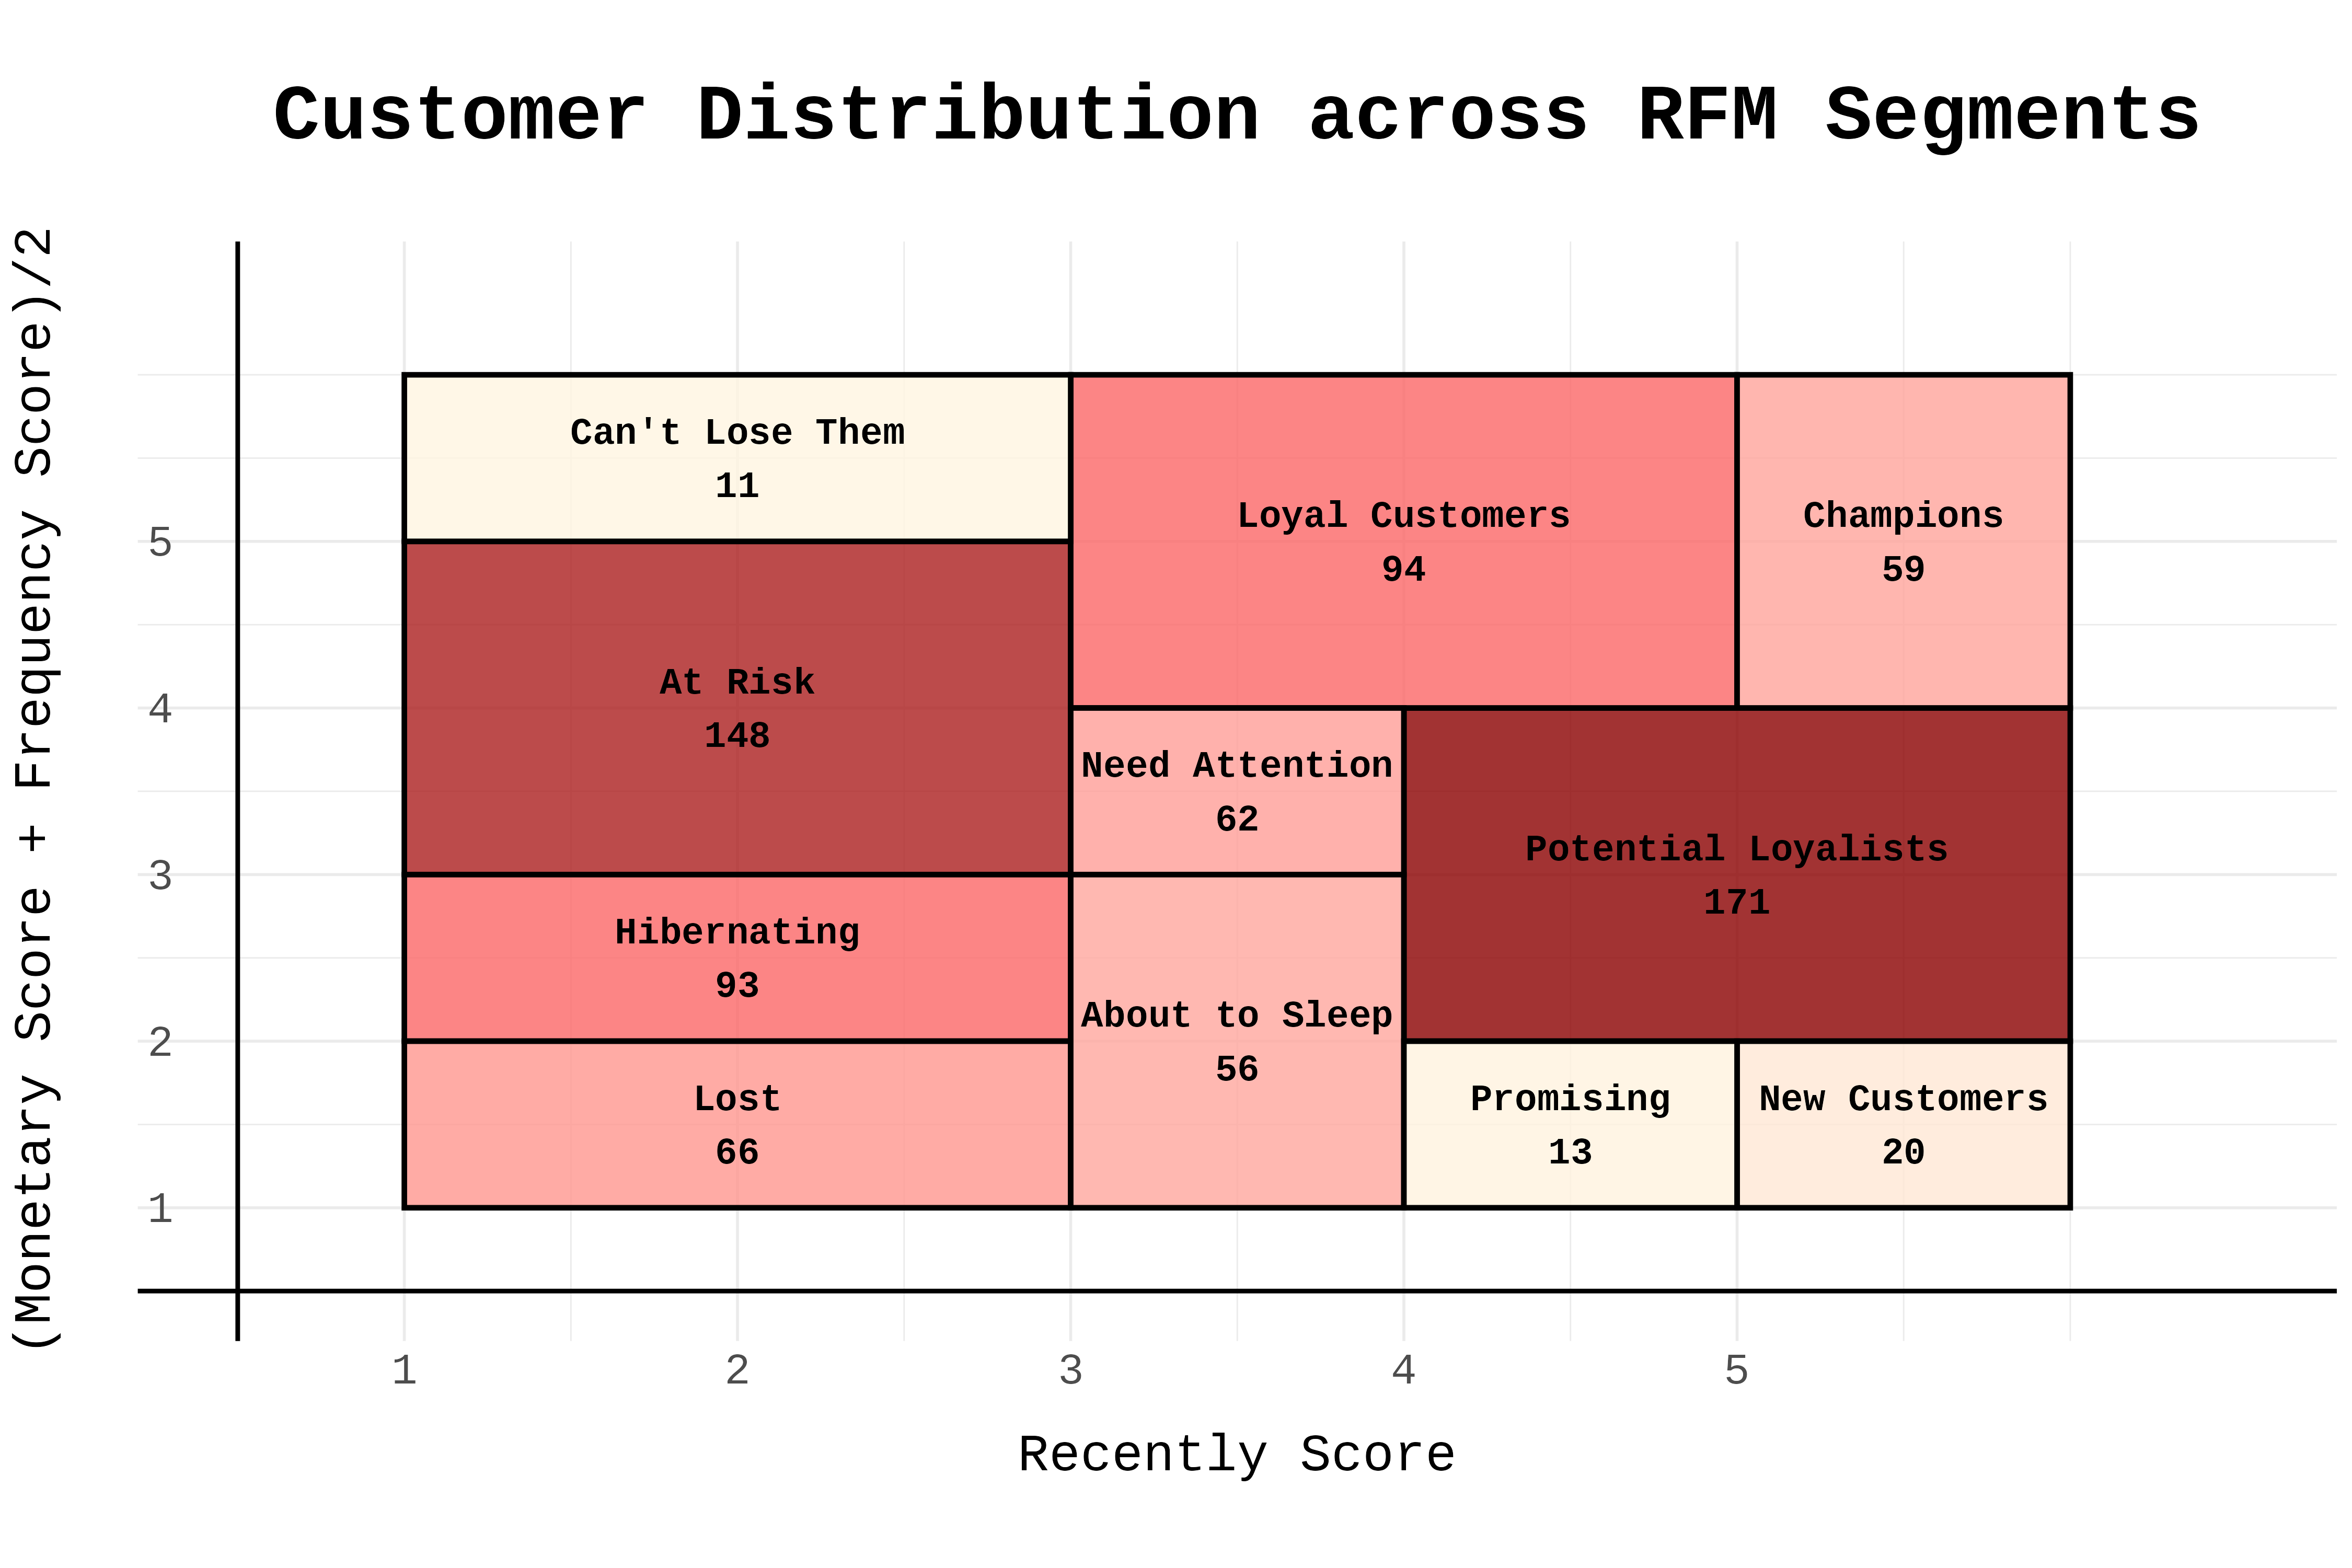

In [50]:
styled_note("วิเคราะห์การกระจายตัวของกลุ่มลูกค้าว่ามีจำนวนเท่าไร : ⬇︎")
display(Image("rfm-heatmap.png")) # Visual Heat Map Chart

## Summary RFM R

In [51]:
%R df_rfm1 # Aggregate RFM


,Customer_Name,Recently (Days),Frequency,Monetary
1,Aaron Bergman,416.0,3,295.385333
2,Aaron Hawkins,12.0,7,249.242857
3,Aaron Smayling,88.0,7,435.813143
4,Adam Bellavance,54.0,8,1107.945714
5,Adam Hart,34.0,10,325.033700
...,...,...,...,...
789,Xylona Preis,43.0,11,296.832250
790,Yana Sorensen,9.0,8,840.055500
791,Yoseph Carroll,4.0,5,1090.870000
792,Zuschuss Carroll,54.0,13,891.745222


In [52]:
%R df_rfm2 # Calculate RFM Score


,Customer_Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2
1,Aaron Bergman,416.0,3,295.385333,1.0,1,2.0,1.5
2,Aaron Hawkins,12.0,7,249.242857,5.0,3,2.0,2.5
3,Aaron Smayling,88.0,7,435.813143,3.0,3,3.0,3.0
4,Adam Bellavance,54.0,8,1107.945714,3.0,4,5.0,4.5
5,Adam Hart,34.0,10,325.033700,4.0,5,3.0,4.0
...,...,...,...,...,...,...,...,...
789,Xylona Preis,43.0,11,296.832250,4.0,5,2.0,3.5
790,Yana Sorensen,9.0,8,840.055500,5.0,4,5.0,4.5
791,Yoseph Carroll,4.0,5,1090.870000,5.0,3,5.0,4.0
792,Zuschuss Carroll,54.0,13,891.745222,3.0,5,5.0,5.0


In [53]:
%R df_rfm_final  # Create Segment


,Customer_Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Imact
1,Aaron Bergman,416.0,3,295.385333,1.0,1,2.0,1.5,Lost,1.0
2,Aaron Hawkins,12.0,7,249.242857,5.0,3,2.0,2.5,Potential Loyalists,4.0
3,Aaron Smayling,88.0,7,435.813143,3.0,3,3.0,3.0,Need Attention,2.0
4,Adam Bellavance,54.0,8,1107.945714,3.0,4,5.0,4.5,Loyal Customers,5.0
5,Adam Hart,34.0,10,325.033700,4.0,5,3.0,4.0,Loyal Customers,5.0
...,...,...,...,...,...,...,...,...,...,...
789,Xylona Preis,43.0,11,296.832250,4.0,5,2.0,3.5,Potential Loyalists,4.0
790,Yana Sorensen,9.0,8,840.055500,5.0,4,5.0,4.5,Champions,5.0
791,Yoseph Carroll,4.0,5,1090.870000,5.0,3,5.0,4.0,Champions,5.0
792,Zuschuss Carroll,54.0,13,891.745222,3.0,5,5.0,5.0,Loyal Customers,5.0


In [54]:
%R segment_n  # Summarise Customer Count


,Segment,No.Customers
1,Potential Loyalists,171
2,At Risk,148
3,Loyal Customers,94
4,Hibernating,93
5,Lost,66
6,Need Attention,62
7,Champions,59
8,About to Sleep,56
9,New Customers,20
10,Promising,13


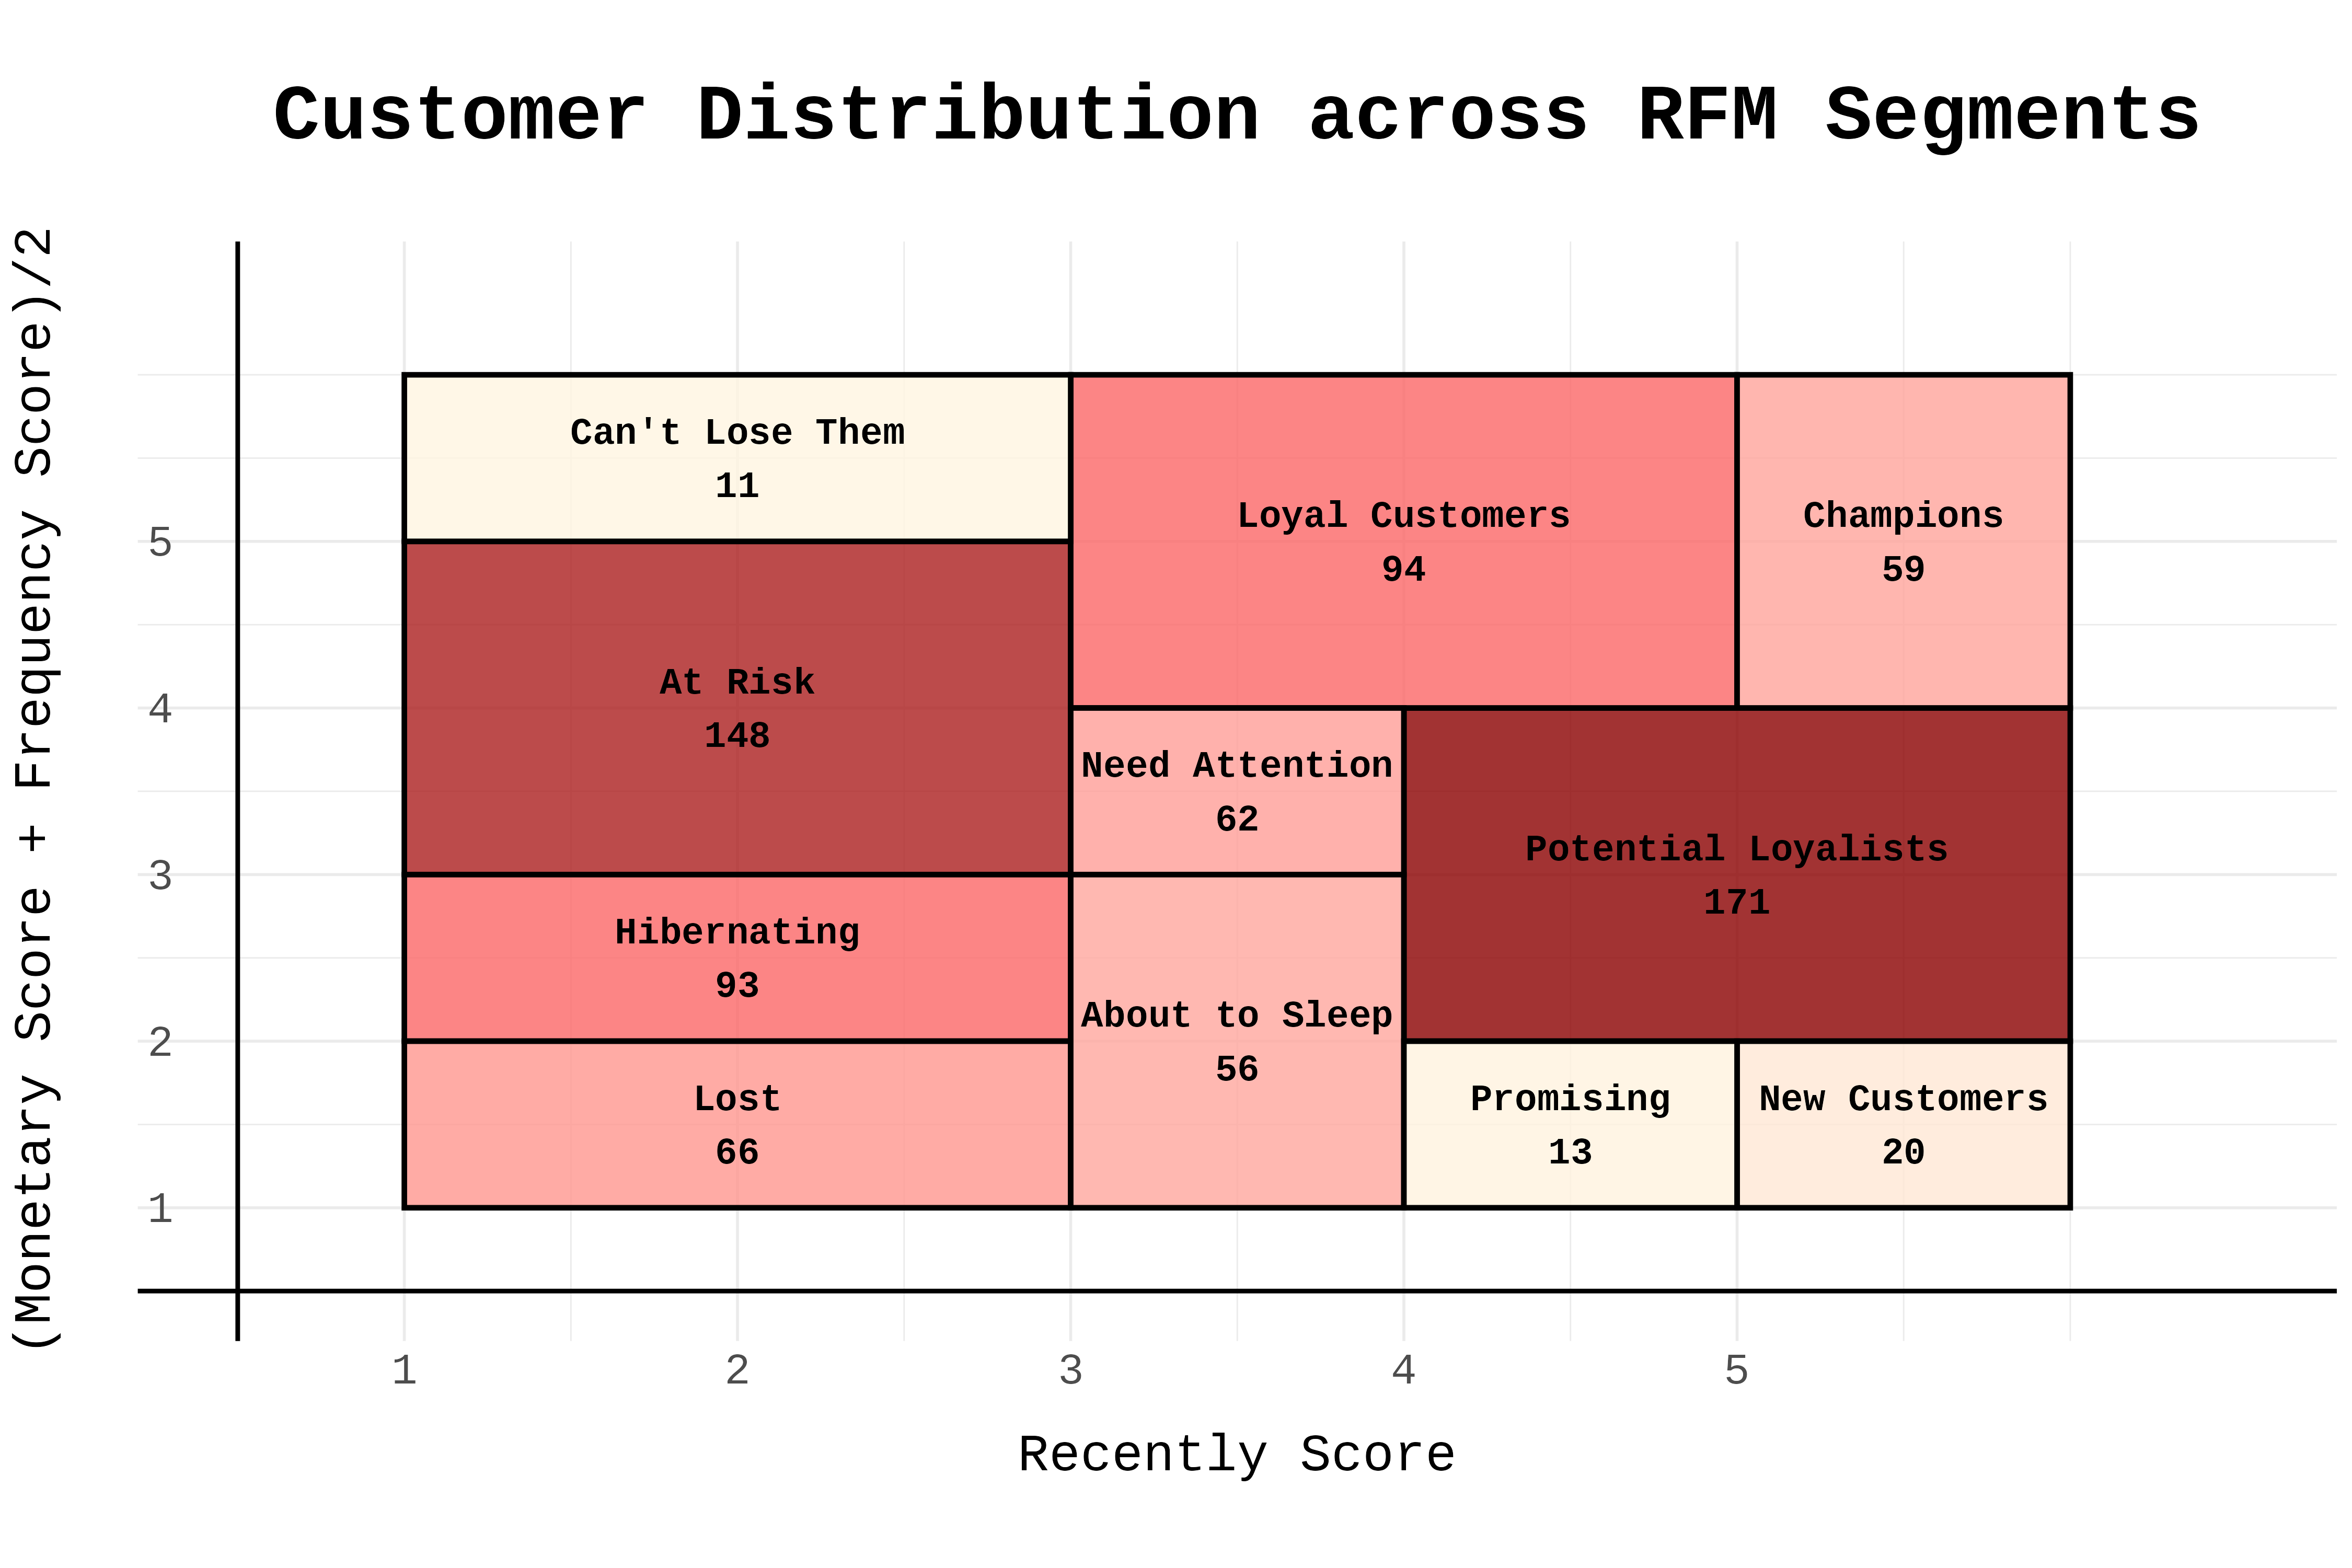

In [55]:
styled_note("วิเคราะห์การกระจายตัวของกลุ่มลูกค้าว่ามีจำนวนเท่าไร : ⬇︎")
display(Image("rfm-heatmap.png")) # Visual Heat Map Chart

# Manage Variables

## Python Variables

```
# ลบตัวแปรทั้งหมดจาก environment, Runtime > Restart runtime, Cmd/Ctrl + M
%reset -f

```

## R Variables

```
%R rm(list = ls()) # ลบตัวแปรทั้งหมด
```

```
%%R

# ดูหน้าตาตาราง
glimpse(df)

# เช็คดูตัวแปร
for (var in ls()) {
  print(var)
  print(get(var))
}

```



In [56]:
%R rm(list = ls()) # ลบตัวแปรทั้งหมด